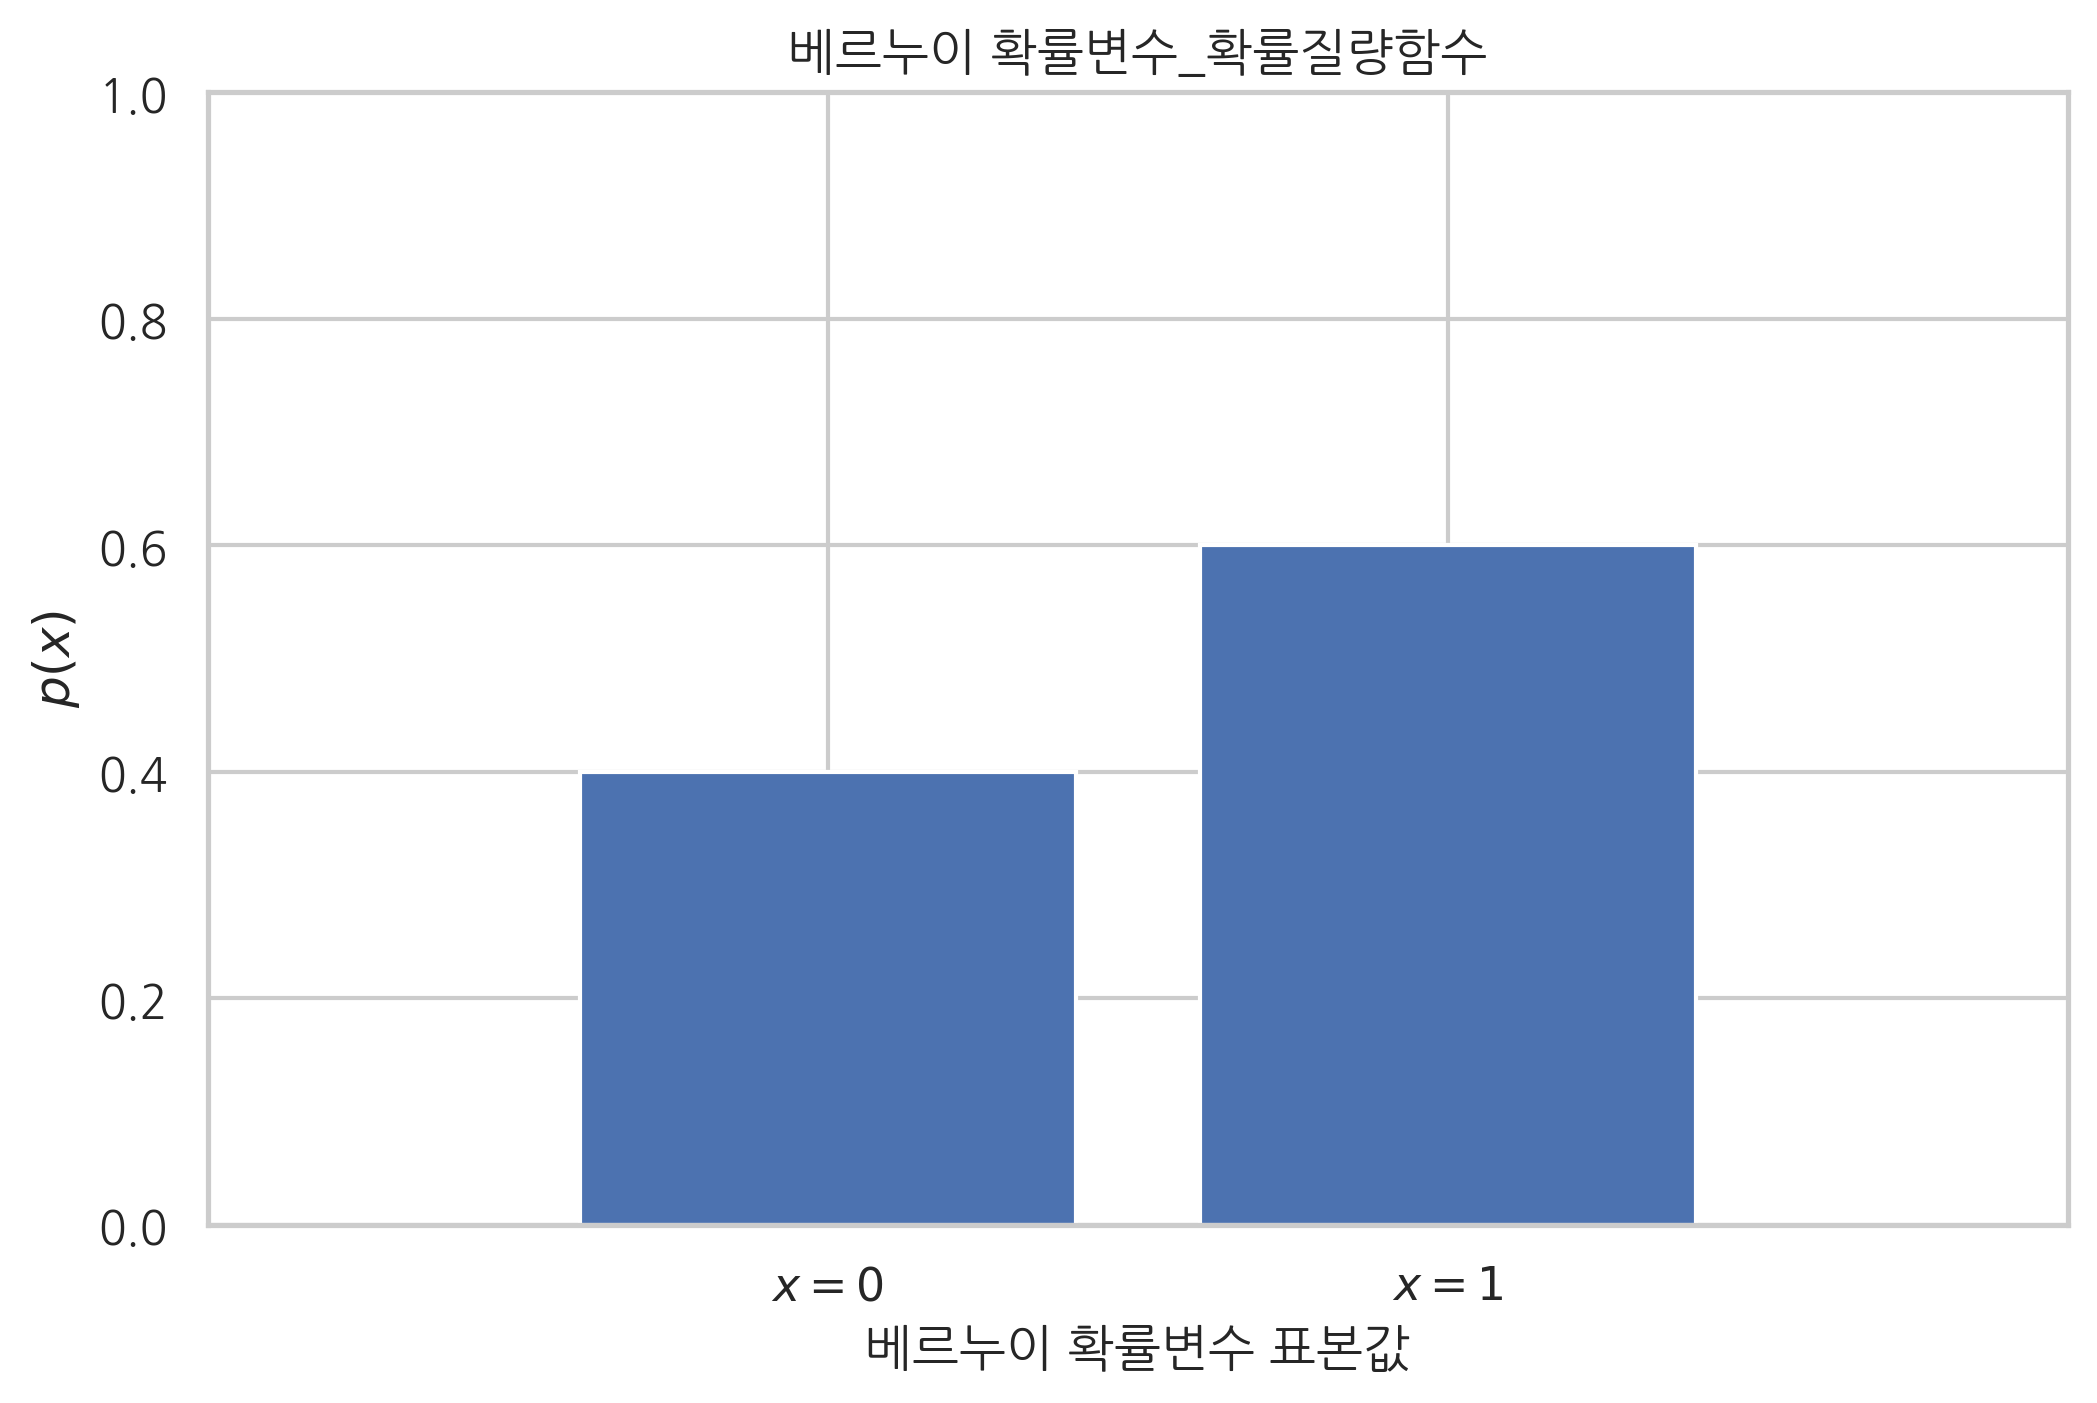

In [26]:
import scipy as sp
mu = 0.6
rv = sp.stats.bernoulli(mu)

xx = [0,1]
p = rv.pmf(xx) # 0, 1에 각각 확률할당
plt.bar(xx,p)
plt.xlim(-1,2)
plt.ylim(0,1)
plt.xticks([0,1],['$x=0$','$x=1$'])
plt.xlabel('베르누이 확률변수 표본값')
plt.ylabel('$p(x)$')
plt.title('베르누이 확률변수_확률질량함수')
plt.show()

# 시뮬레이션 = 시행 
# 1회 시행 결과 = 표본
# --> 시뮬레이션 == 표본 생성 작업(시행)

In [51]:
x = rv.rvs(100, random_state=1) # 시행횟수(시뮬레이션 횟수), 씨드값 = 1
x

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

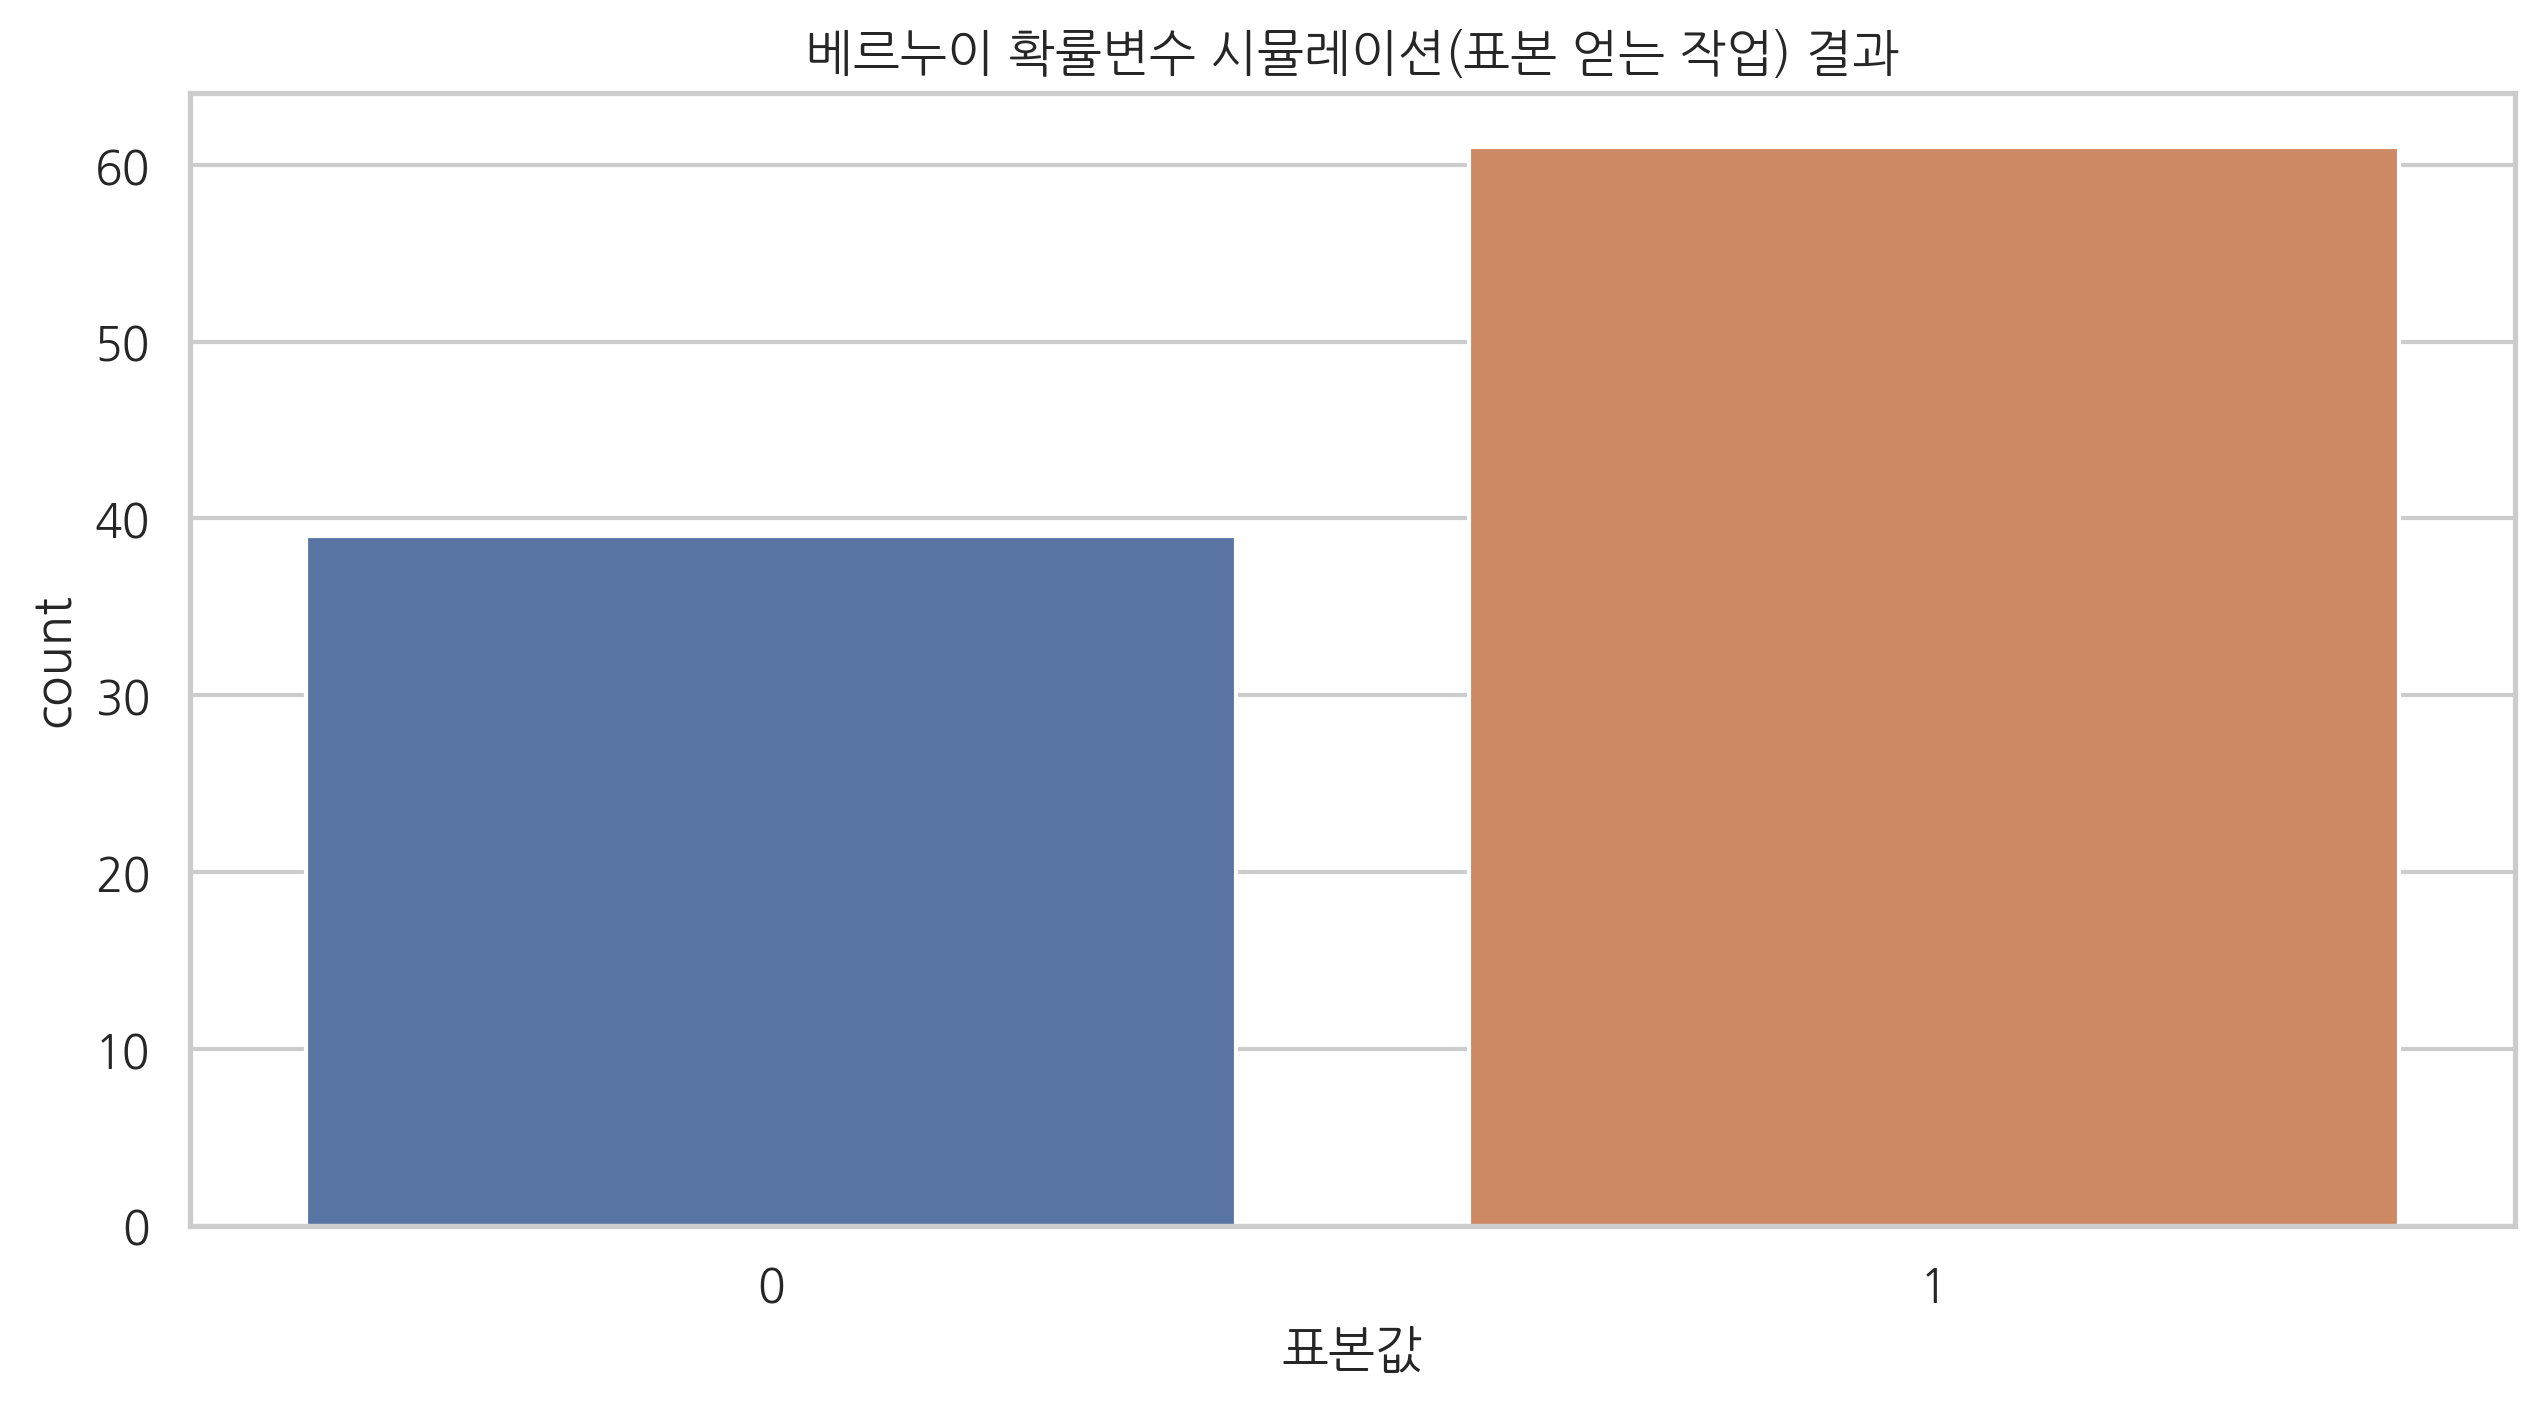

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x) # 0과 1 빈도를 세어서 시각화
plt.title('베르누이 확률변수 시뮬레이션(표본 얻는 작업) 결과')
plt.xlabel('표본값')
plt.show()

In [106]:
y = np.bincount(x, minlength=2)/float(len(x))

df = pd.DataFrame({
    '이론' : rv.pmf(xx),
    '시뮬레이션(표본)' : y
}, index=[0,1])

df

,이론,시뮬레이션(표본)
0,0.4,0.39
1,0.6,0.61


In [110]:
df2 = df.stack().reset_index()
df2.columns=['표본값','유형','비율(확률)']
df2

,표본값,유형,비율(확률)
0,0,이론,0.40
1,0,시뮬레이션(표본),0.39
2,1,이론,0.60
3,1,시뮬레이션(표본),0.61


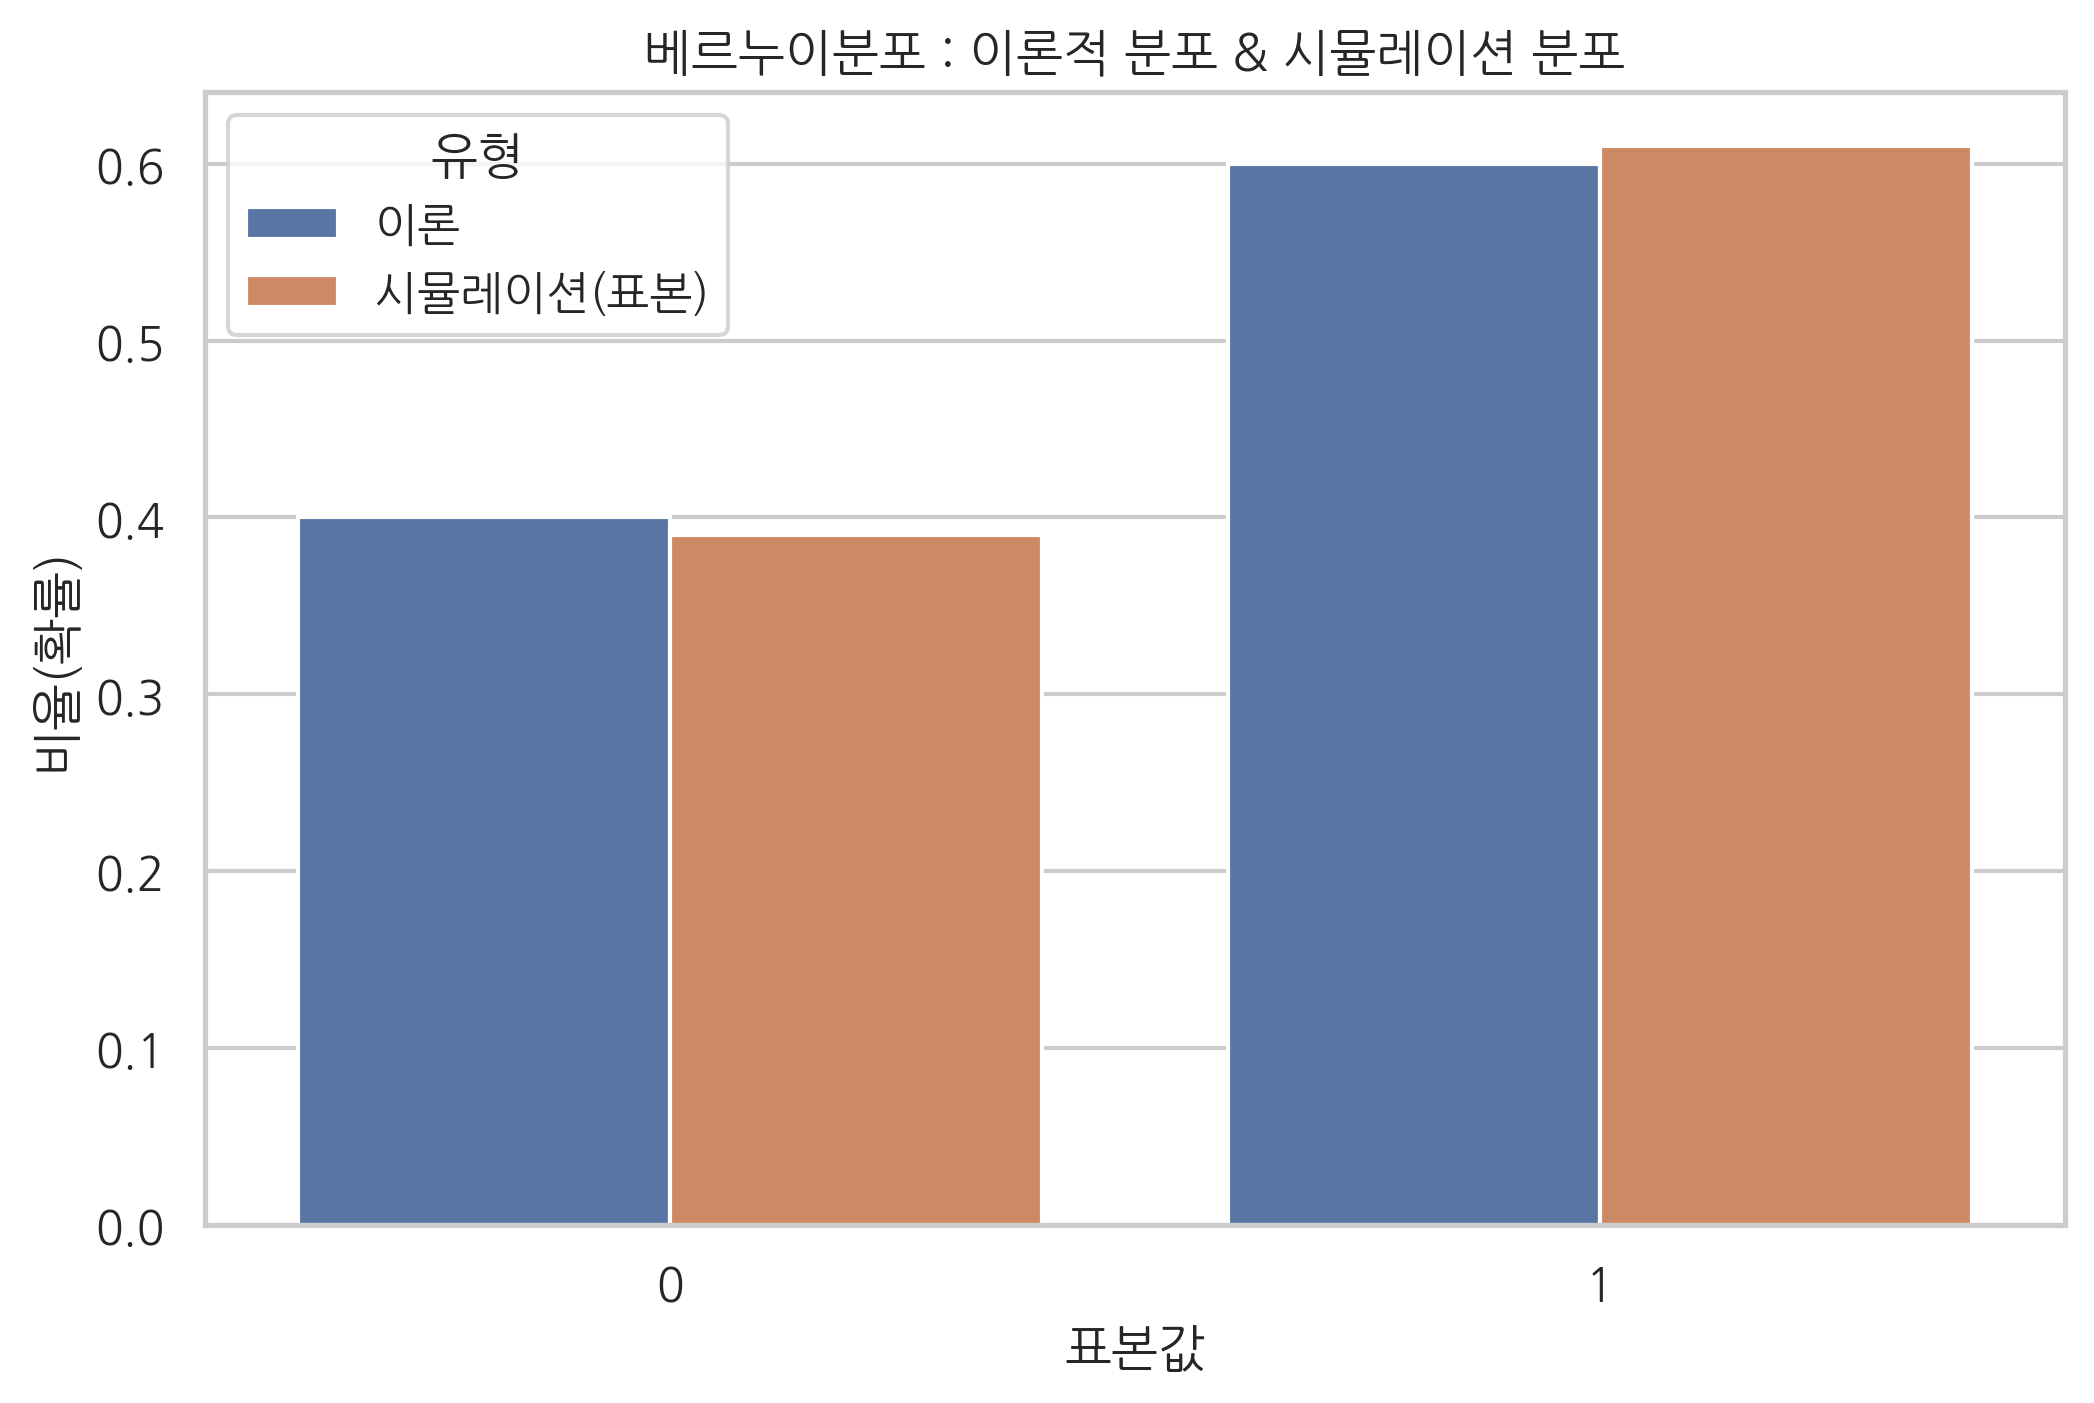

In [115]:
sns.barplot(x='표본값', y='비율(확률)', data=df2, hue='유형')
plt.title('베르누이분포 : 이론적 분포 & 시뮬레이션 분포')
plt.show()

In [237]:
(0.5**3)+(0.5**3)

0.25

In [166]:
((0.1)**2)*0.9+((0.9)**2*0.1)

0.09000000000000002

   표본     유형   확률
0   0     이론  0.5
1   0  시뮬레이션  0.3
2   1     이론  0.5
3   1  시뮬레이션  0.7


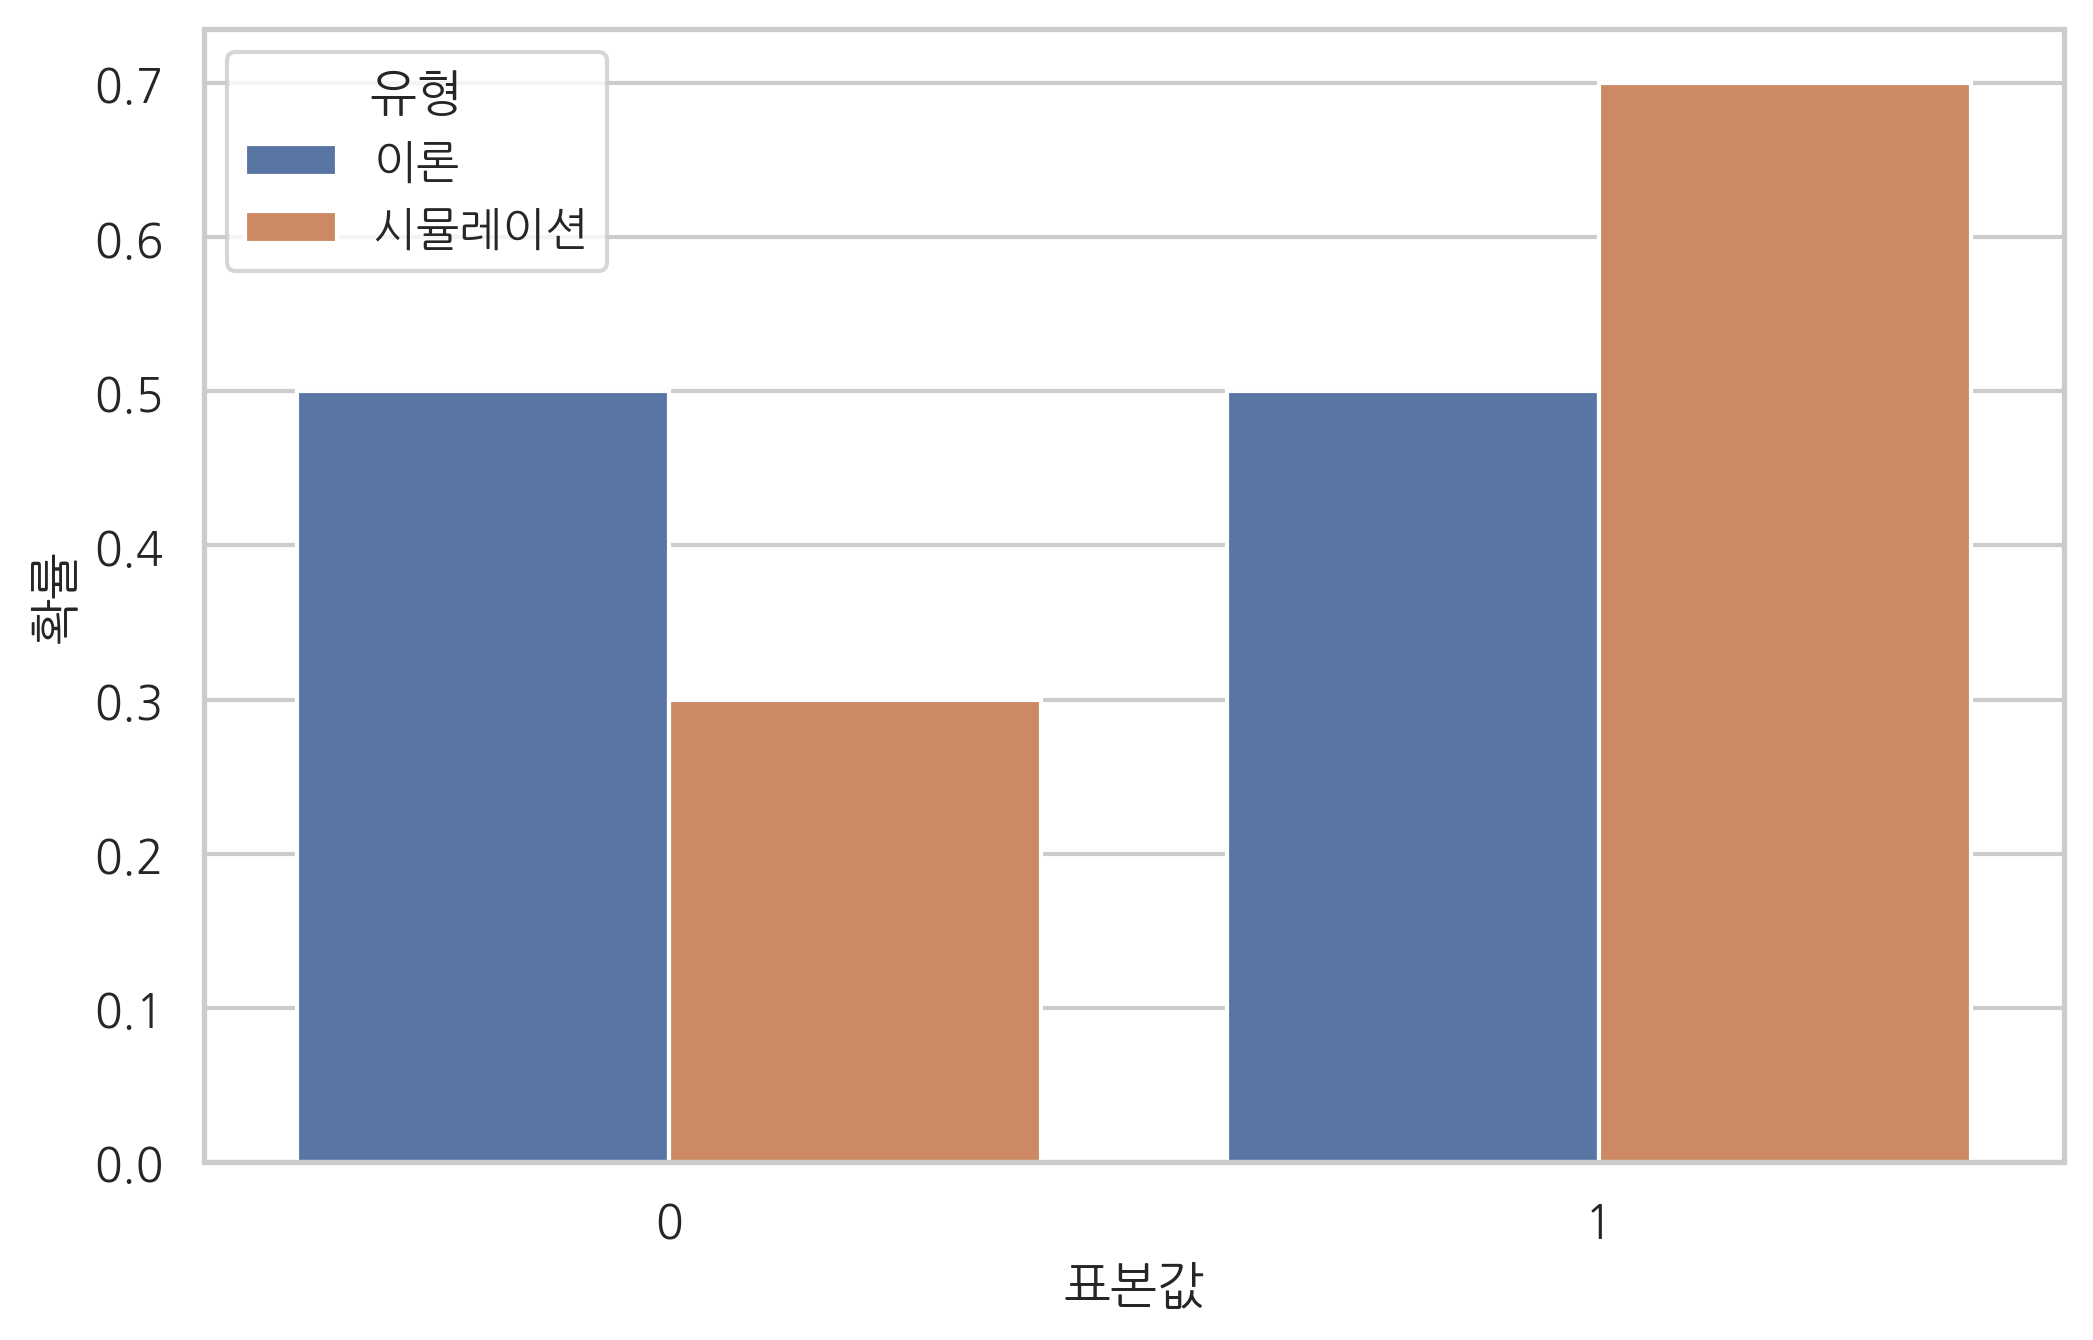

In [165]:
# 8.2.2 연습문제 
#1. 
rv = sp.stats.bernoulli(0.5)
pmf = rv.pmf([0,1])

x_1 = rv.rvs(10, random_state=0)
x_2 = rv.rvs(1000, random_state=0)
p_1 = np.bincount(x_1, minlength=2)/float(len(x_1))
p_2 = np.bincount(x_2, minlength=2)/float(len(x_2))

df = pd.DataFrame({
    '이론' : pmf,
    '시뮬레이션' : p_1
},index=[0,1])
df2 = df.stack().reset_index()
df2.columns = ['표본','유형','확률']
print(df2)

sns.barplot(x='표본',y='확률',data=df2, hue='유형')
plt.xlabel('표본값')
plt.show()

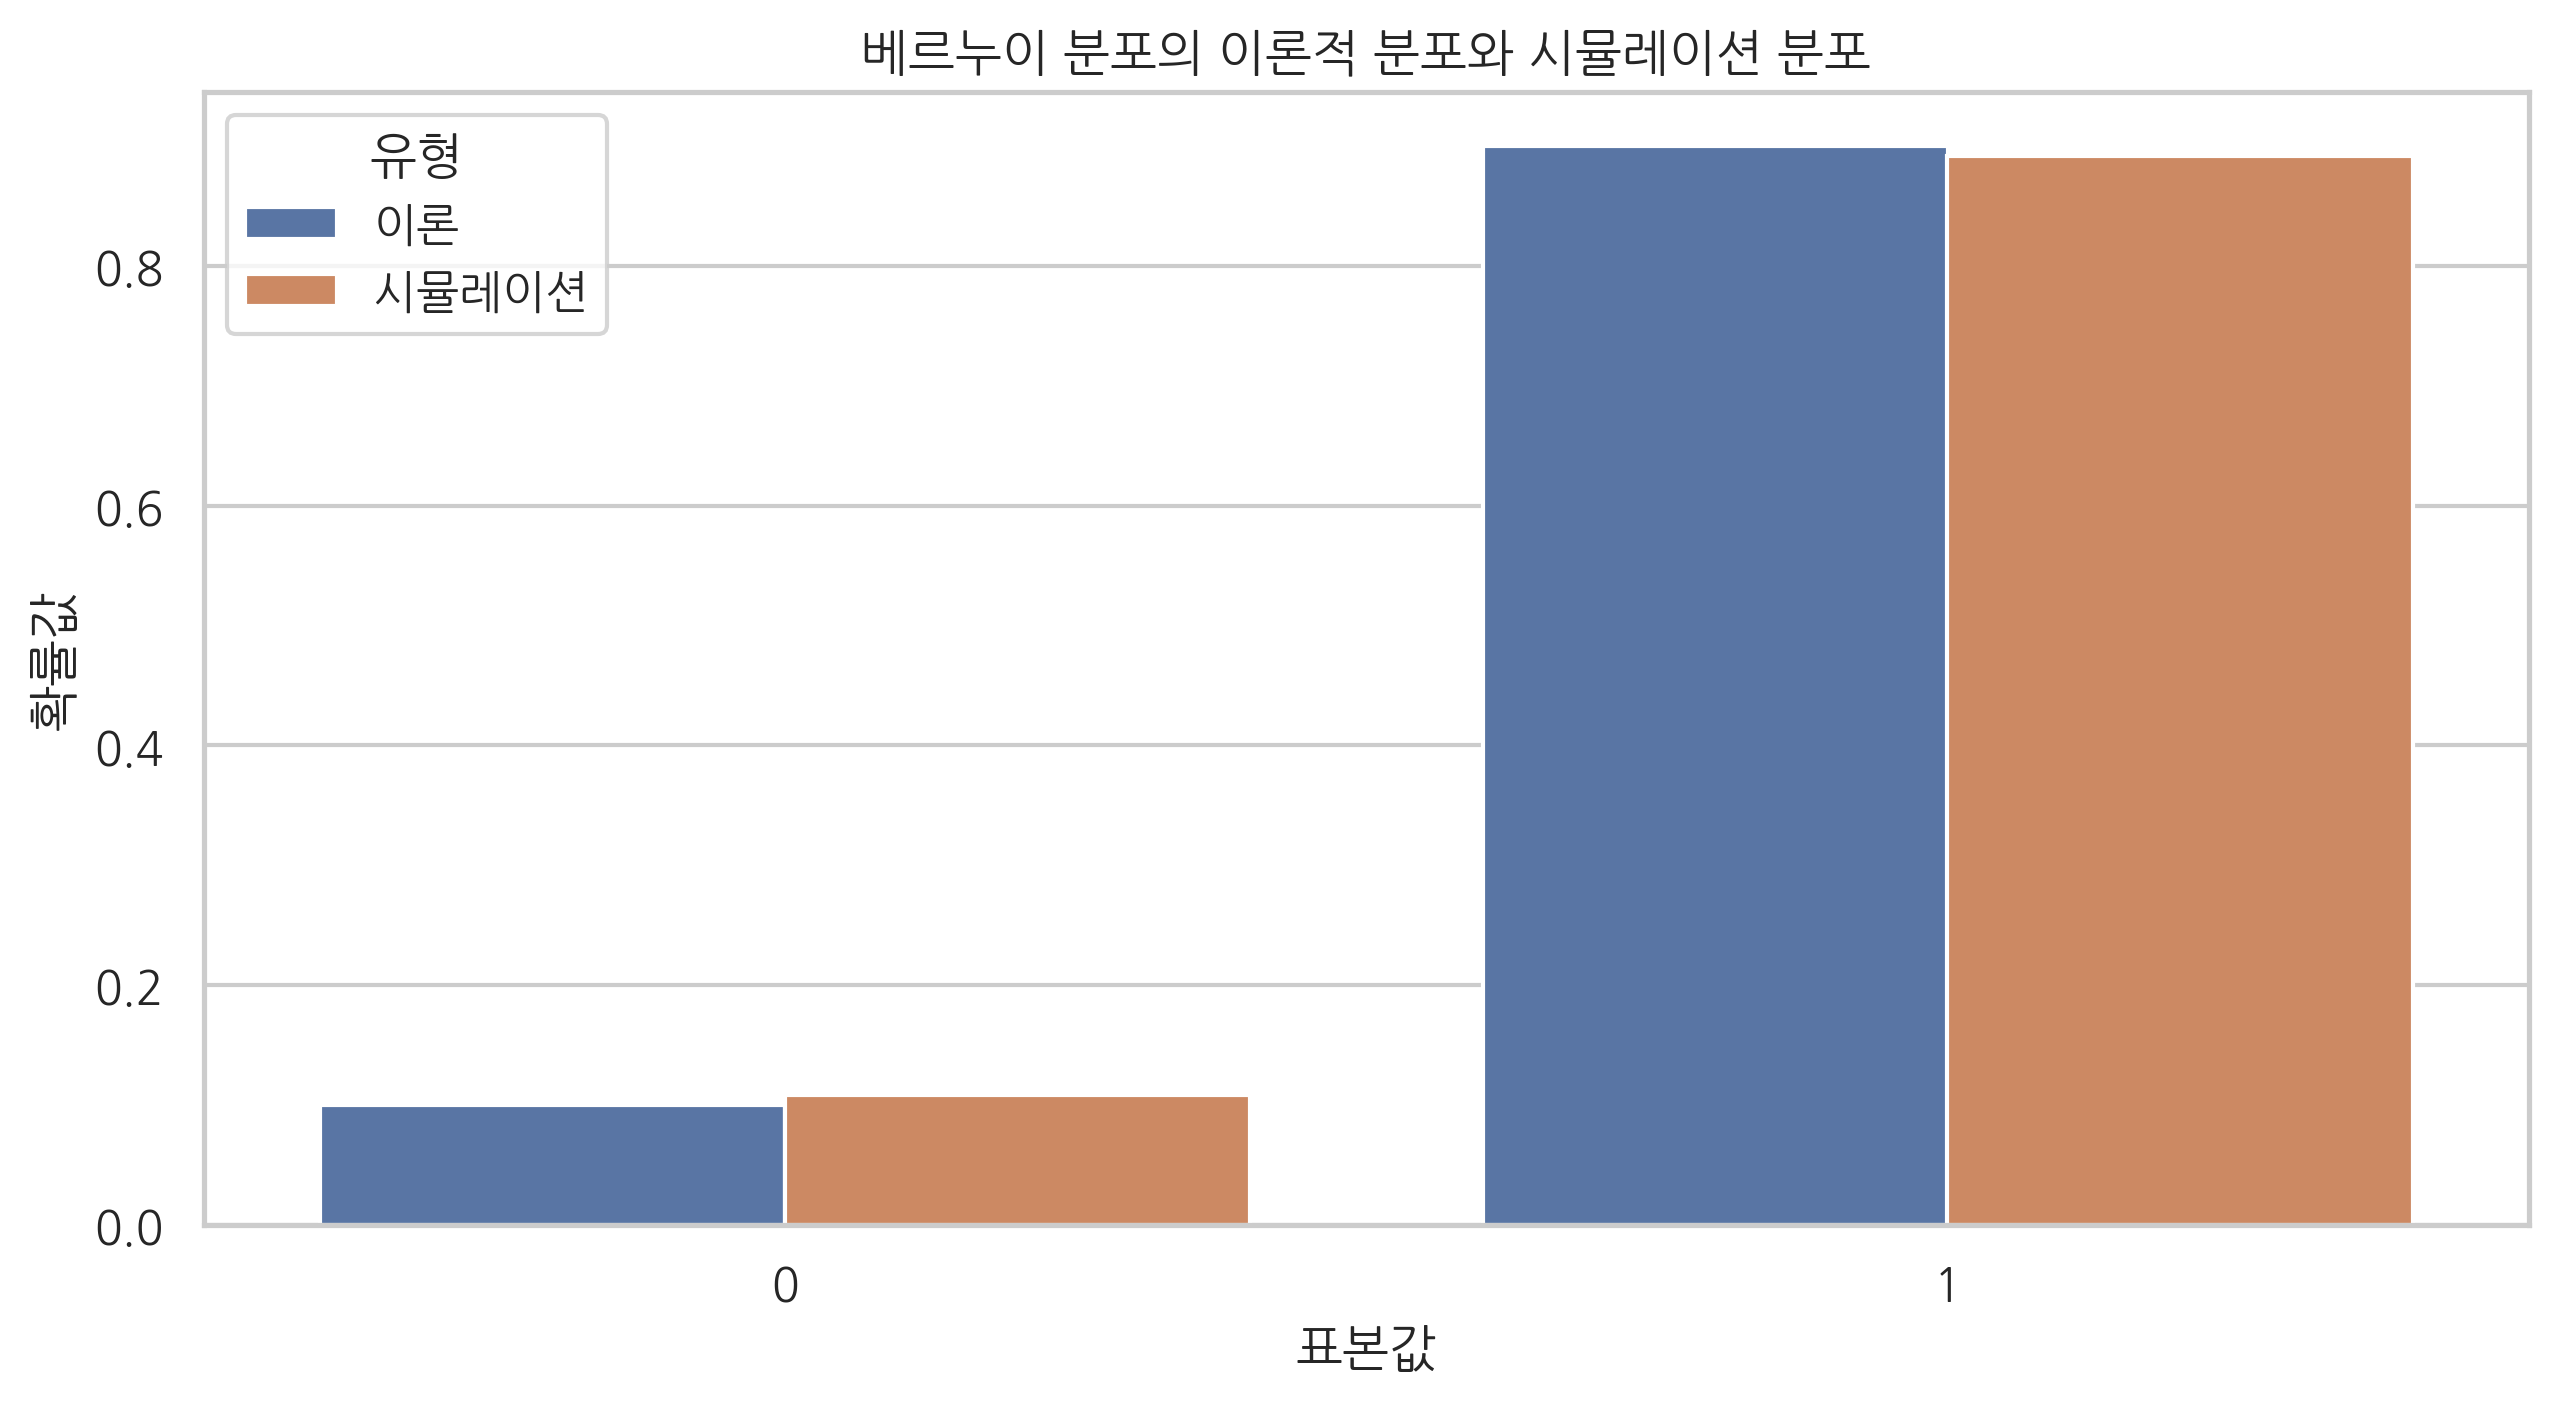

In [222]:
#2. 
rv = sp.stats.bernoulli(0.9) #확률분포
p2 = rv.pmf([0,1]) #확률질량함수

x_2 = rv.rvs(1000, random_state=0) #표본 1000개
p_2 = np.bincount(x_2, minlength=2)/float(len(x_2)) #표본 확률분포

df3 = pd.DataFrame({
    '이론' : p2,
    '시뮬레이션' : p_2
}, index=[0,1])

df4 = df3.stack().reset_index()
df4.columns=['표본값','유형','확률값']
df4

plt.figure(figsize=(10,5))
sns.barplot(x='표본값',y='확률값',hue='유형',data=df4)
plt.title('베르누이 분포의 이론적 분포와 시뮬레이션 분포')
plt.show()

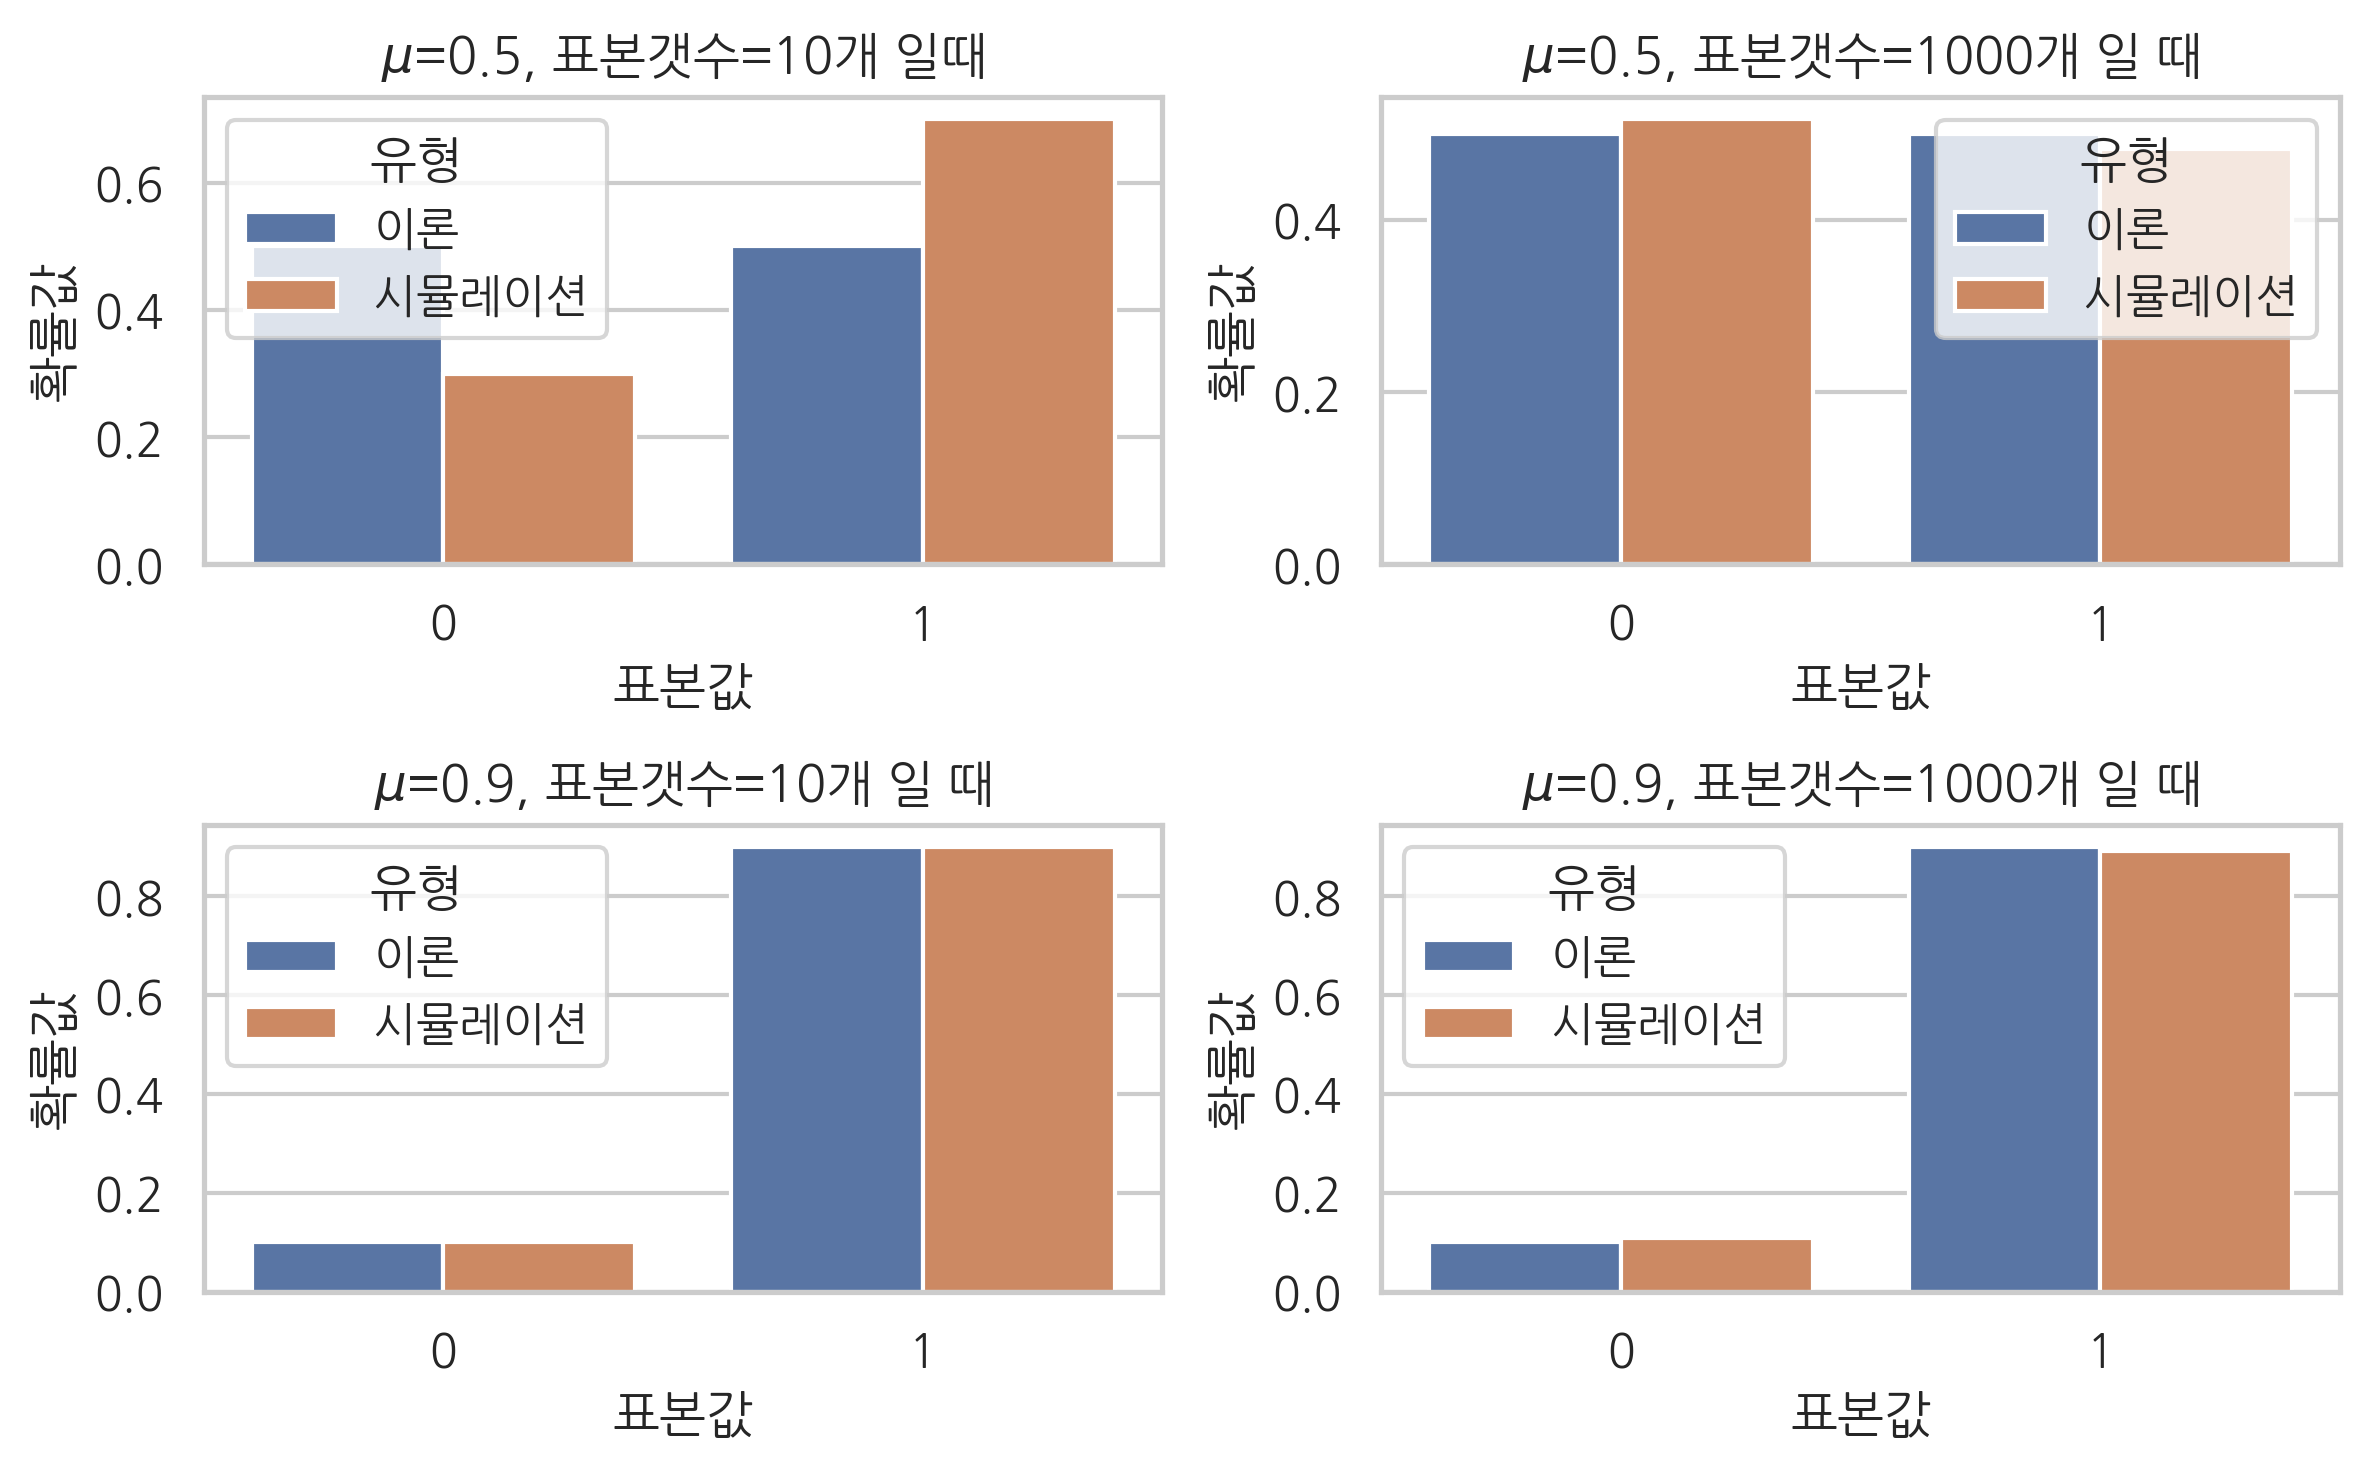

In [233]:
# 다른 방식으로 다시 해보자.
#8.2.2 연습문제 
def make_bernoulli(mu, M) : 
    rv = sp.stats.bernoulli(mu)
    p = rv.pmf([0,1]) # 확률질량함수
    
    x = rv.rvs(M, random_state=0)
    p_ = np.bincount(x, minlength=2)/float(len(x)) #표본 확률분포
    
    df = pd.DataFrame({
        '이론' : p,
        '시뮬레이션' : p_
    },index=[0,1])
    df2 = df.stack().reset_index()
    df2.columns = ['표본값','유형','확률값']
    return df2

plt.subplot(221)
sns.barplot(x='표본값',y='확률값',hue='유형',data=make_bernoulli(0.5,10))
plt.title(f'$\mu$=0.5, 표본갯수=10개 일때')
plt.xlabel('표본값')

plt.subplot(222)
sns.barplot(x='표본값',y='확률값',hue='유형',data=make_bernoulli(0.5,1000))
plt.title(f'$\mu$=0.5, 표본갯수=1000개 일 때')
plt.xlabel('표본값')

plt.subplot(223)
sns.barplot(x='표본값',y='확률값',hue='유형',data=make_bernoulli(0.9,10))
plt.title(f'$\mu$=0.9, 표본갯수=10개 일 때')
plt.xlabel('표본값')

plt.subplot(224)
sns.barplot(x='표본값',y='확률값',hue='유형',data=make_bernoulli(0.9,1000))
plt.title(f'$\mu$=0.9, 표본갯수=1000개 일 때')
plt.xlabel('표본값')

plt.tight_layout()
plt.show()

In [244]:
print('표본평균 {}'.format(np.mean(x)))
print(f'표본분산 {np.var(x,ddof=1)}')

표본평균 0.61
표본분산 0.2403030303030303


In [249]:
s = sp.stats.describe(x)
print(s[2])
print(s[3])


0.61
0.2403030303030303


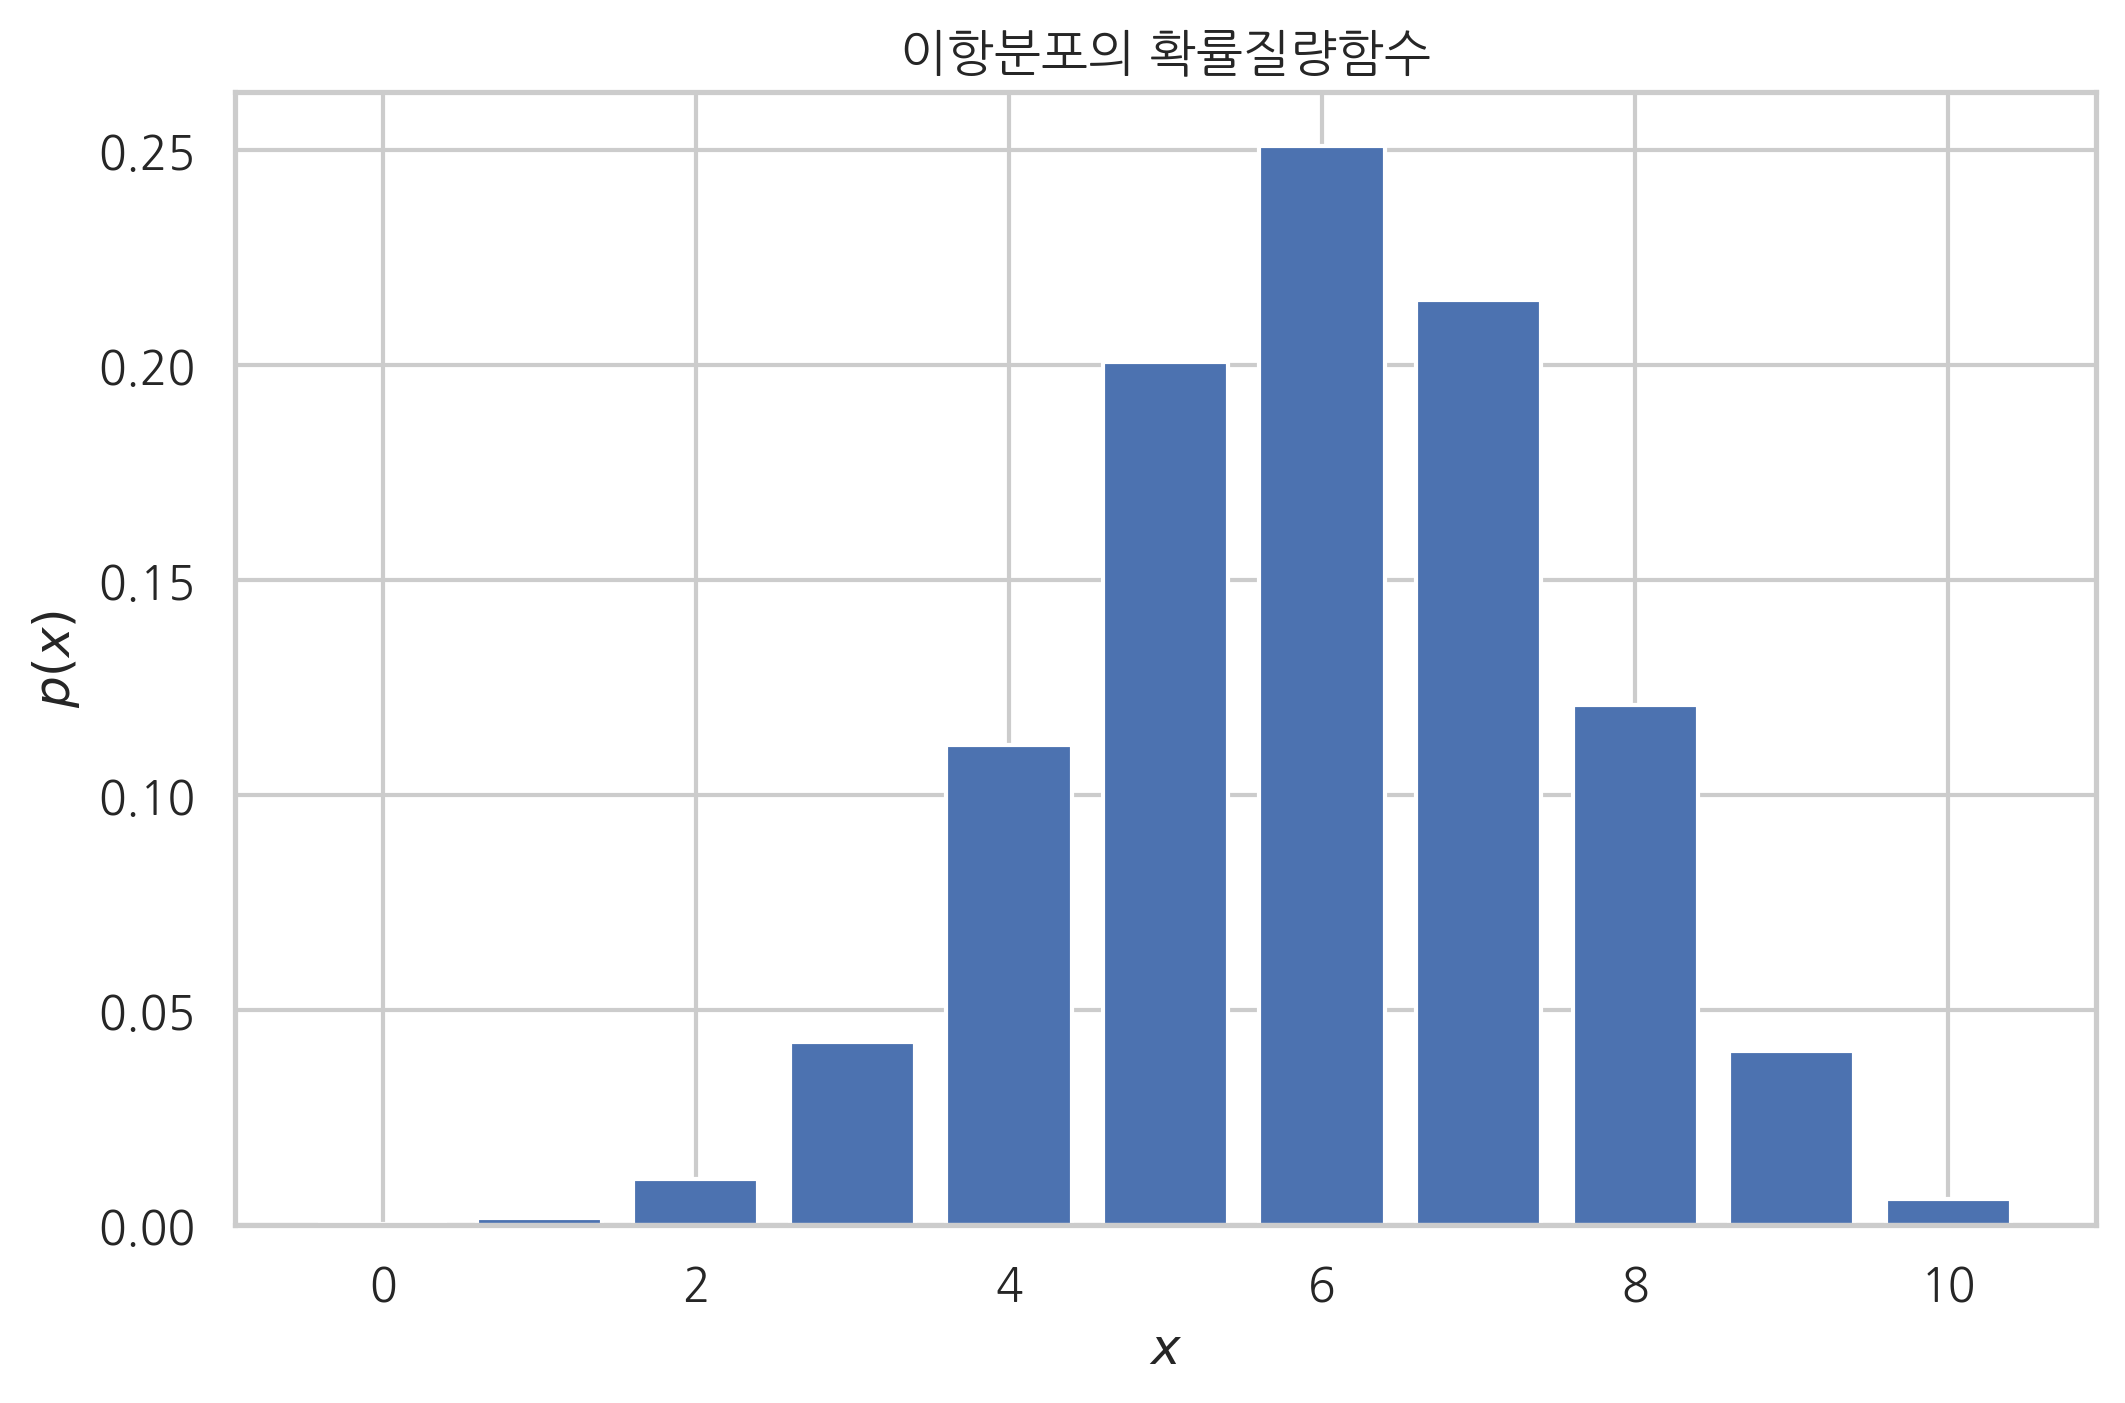

In [254]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

xx = np.arange(N+1)
yy = rv.pmf(xx)
plt.bar(xx, yy, align='center')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.title('이항분포의 확률질량함수')
plt.show()

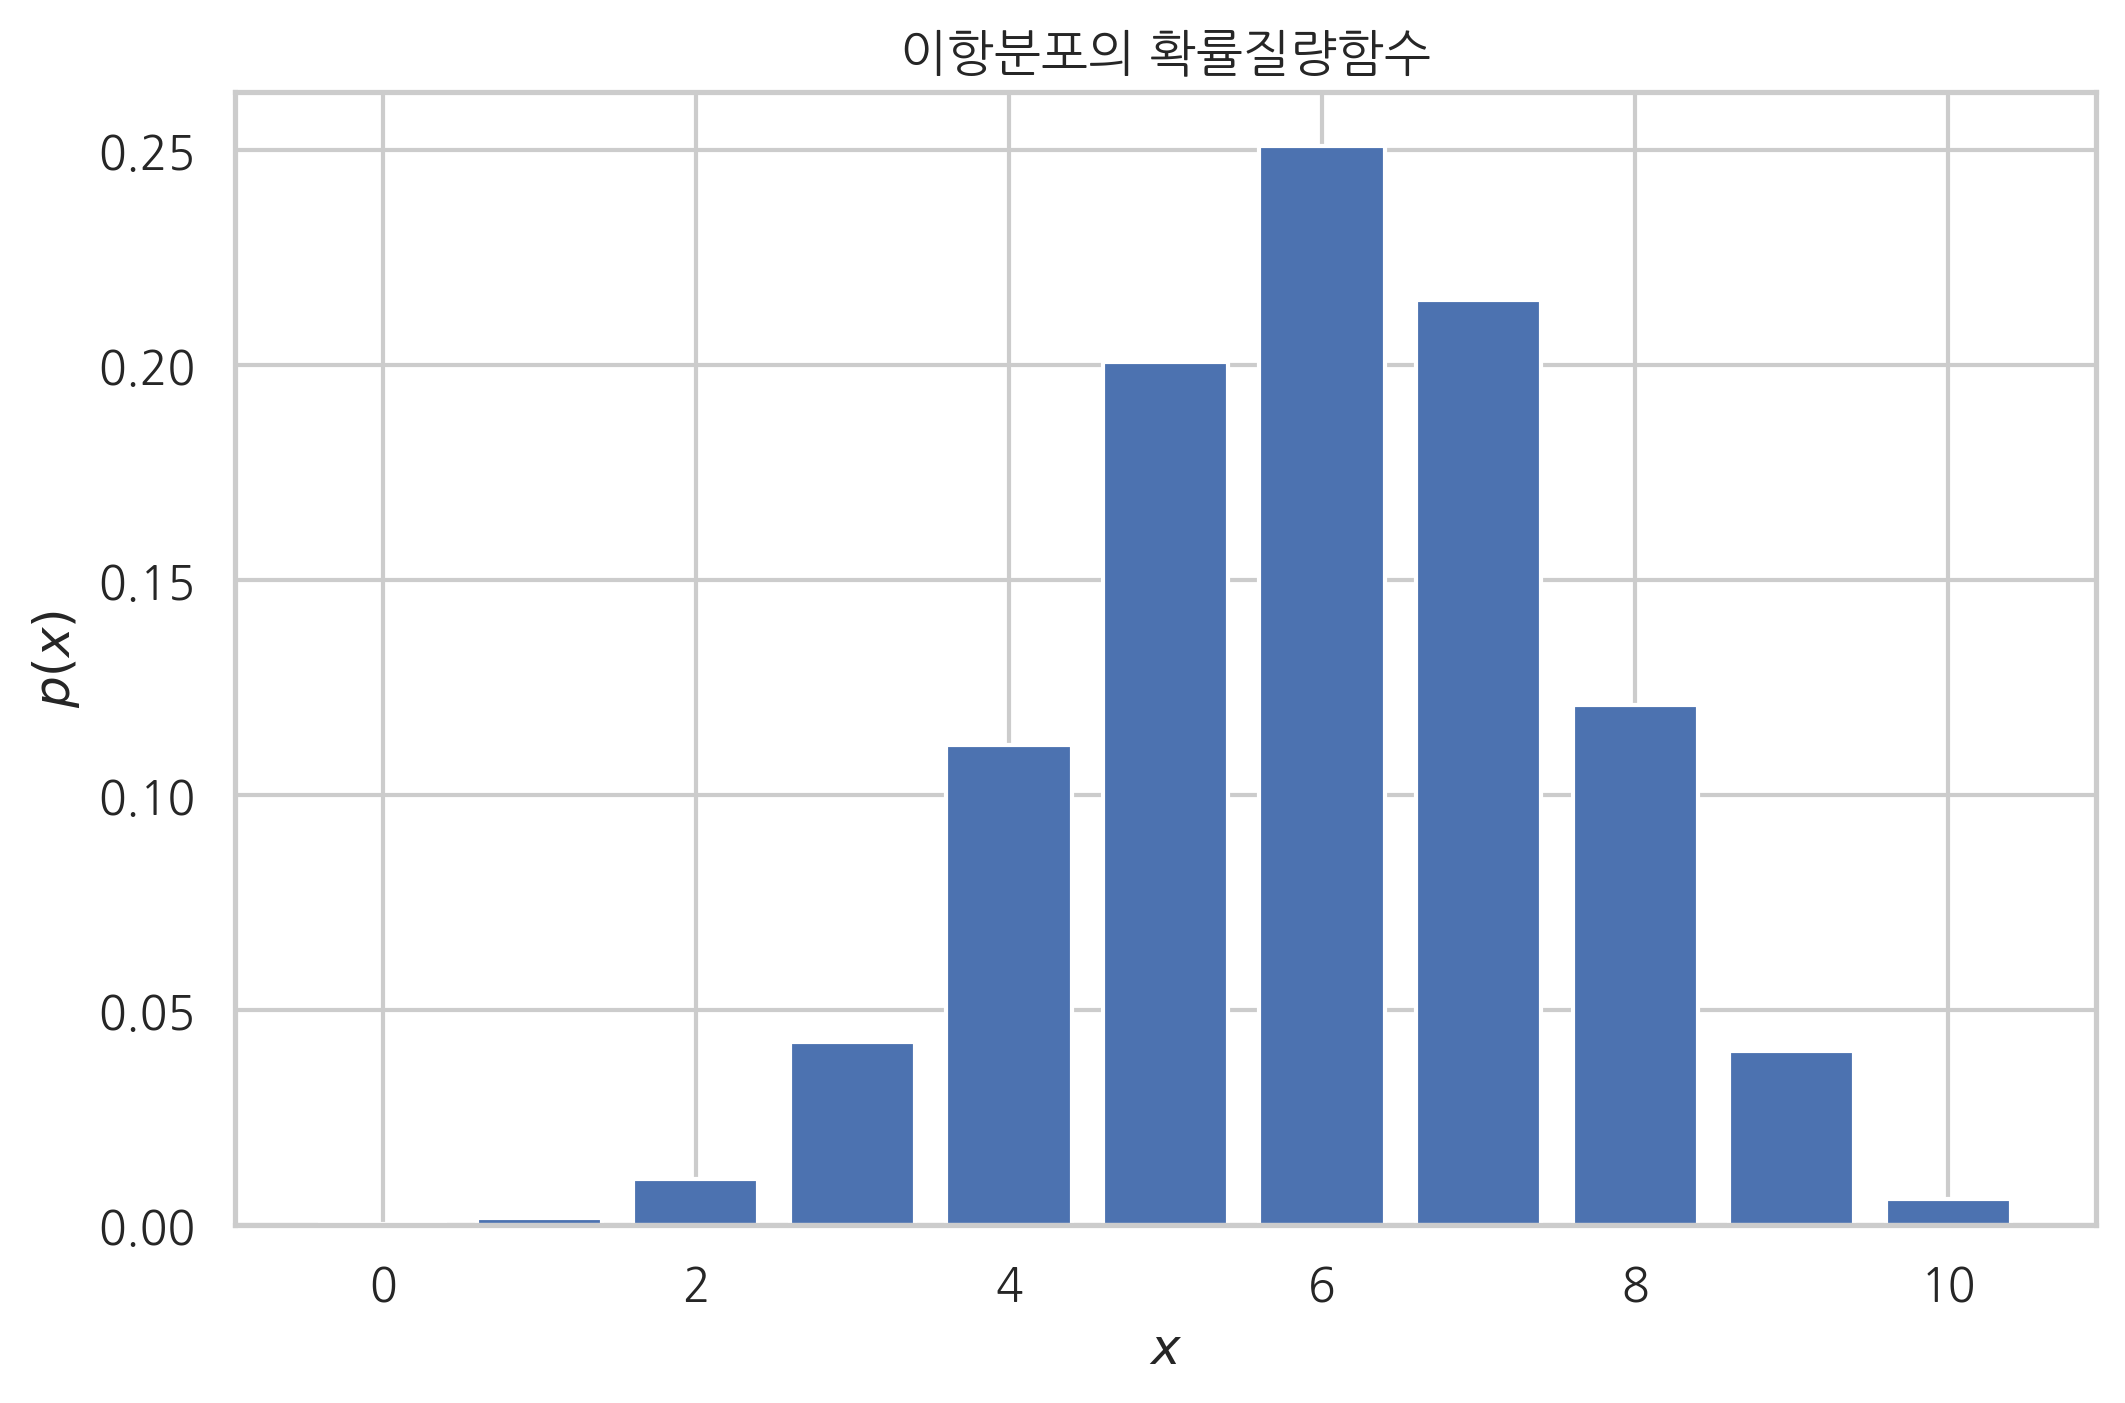

In [310]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

xx = np.arange(N+1)
yy = rv.pmf(xx)
plt.bar(xx, yy, align='center')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.title('이항분포의 확률질량함수')
plt.show()

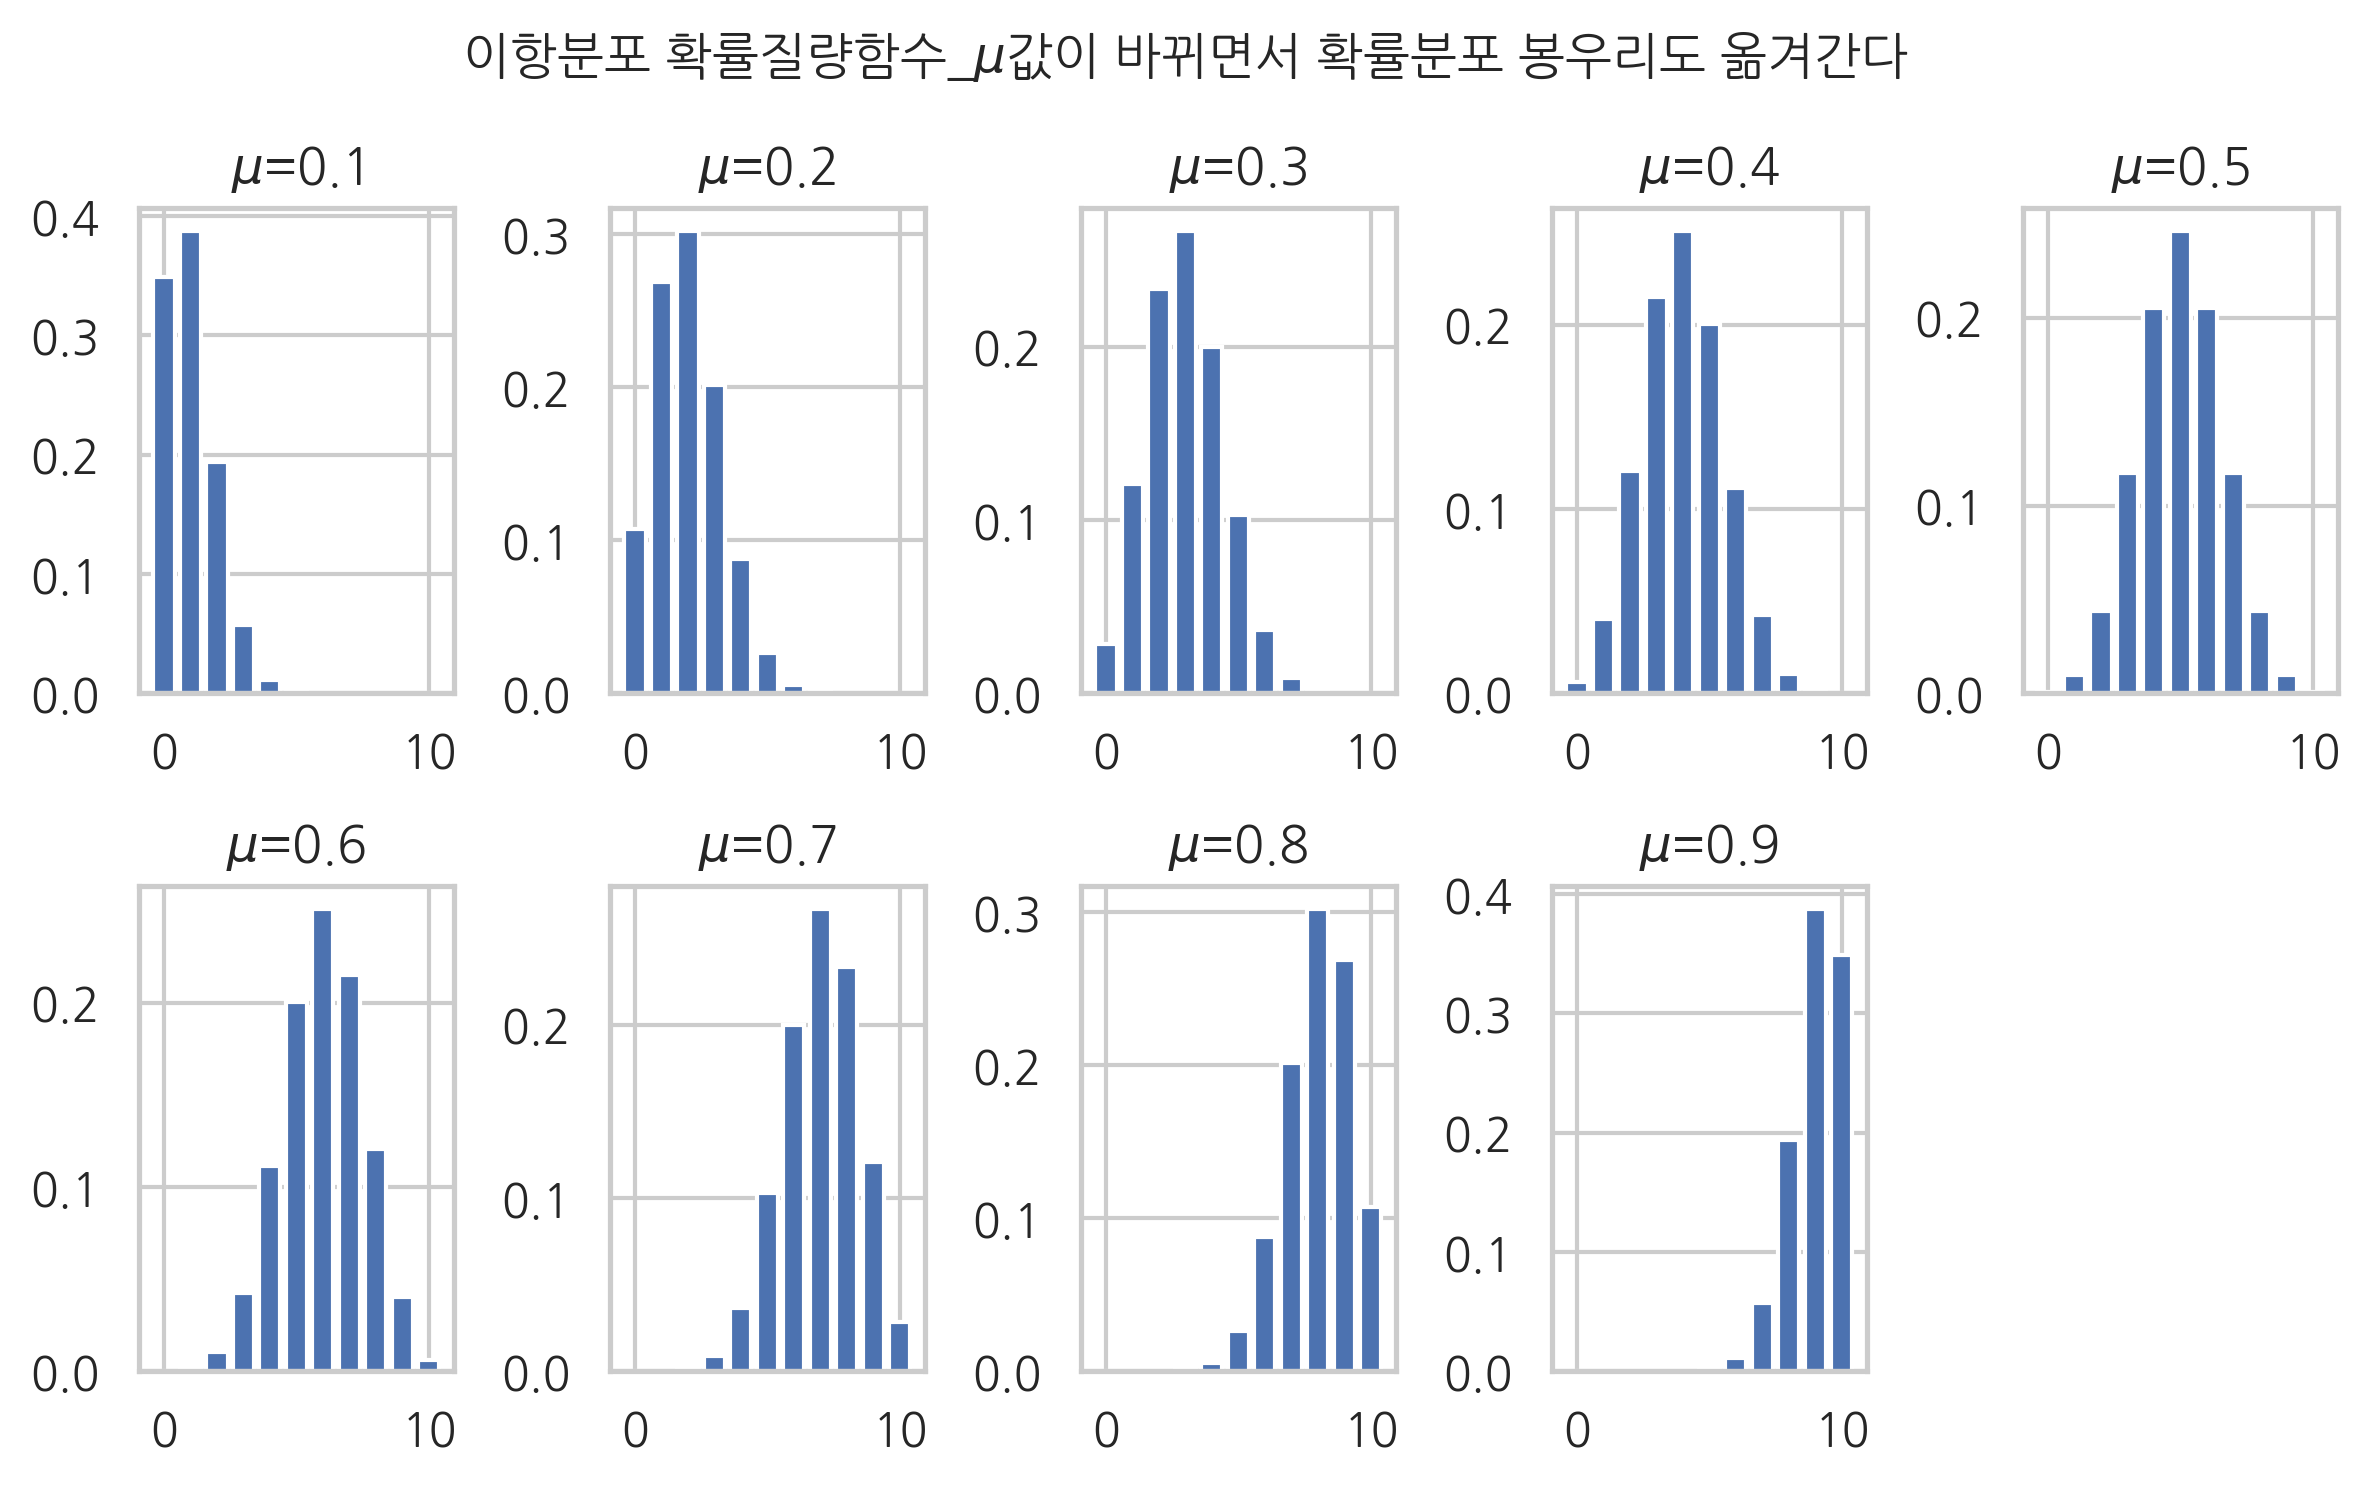

In [344]:
def B(N, mu) : 
    rv = sp.stats.binom(N, mu)
    xx = np.arange(N+1)
    yy = rv.pmf(xx)
    plt.bar(xx, yy, align='center')


start = 251
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] : 
    plt.subplot(start)
    B(10,i)
    start += 1
    plt.title(f'$\mu$={i}')
plt.suptitle('이항분포 확률질량함수_$\mu$값이 바뀌면서 확률분포 봉우리도 옮겨간다')
plt.tight_layout()
plt.show()

In [313]:
#이항분포에서 표본추출해서 표본분포 모양을 보자. 
x = rv.rvs(100, random_state=0)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

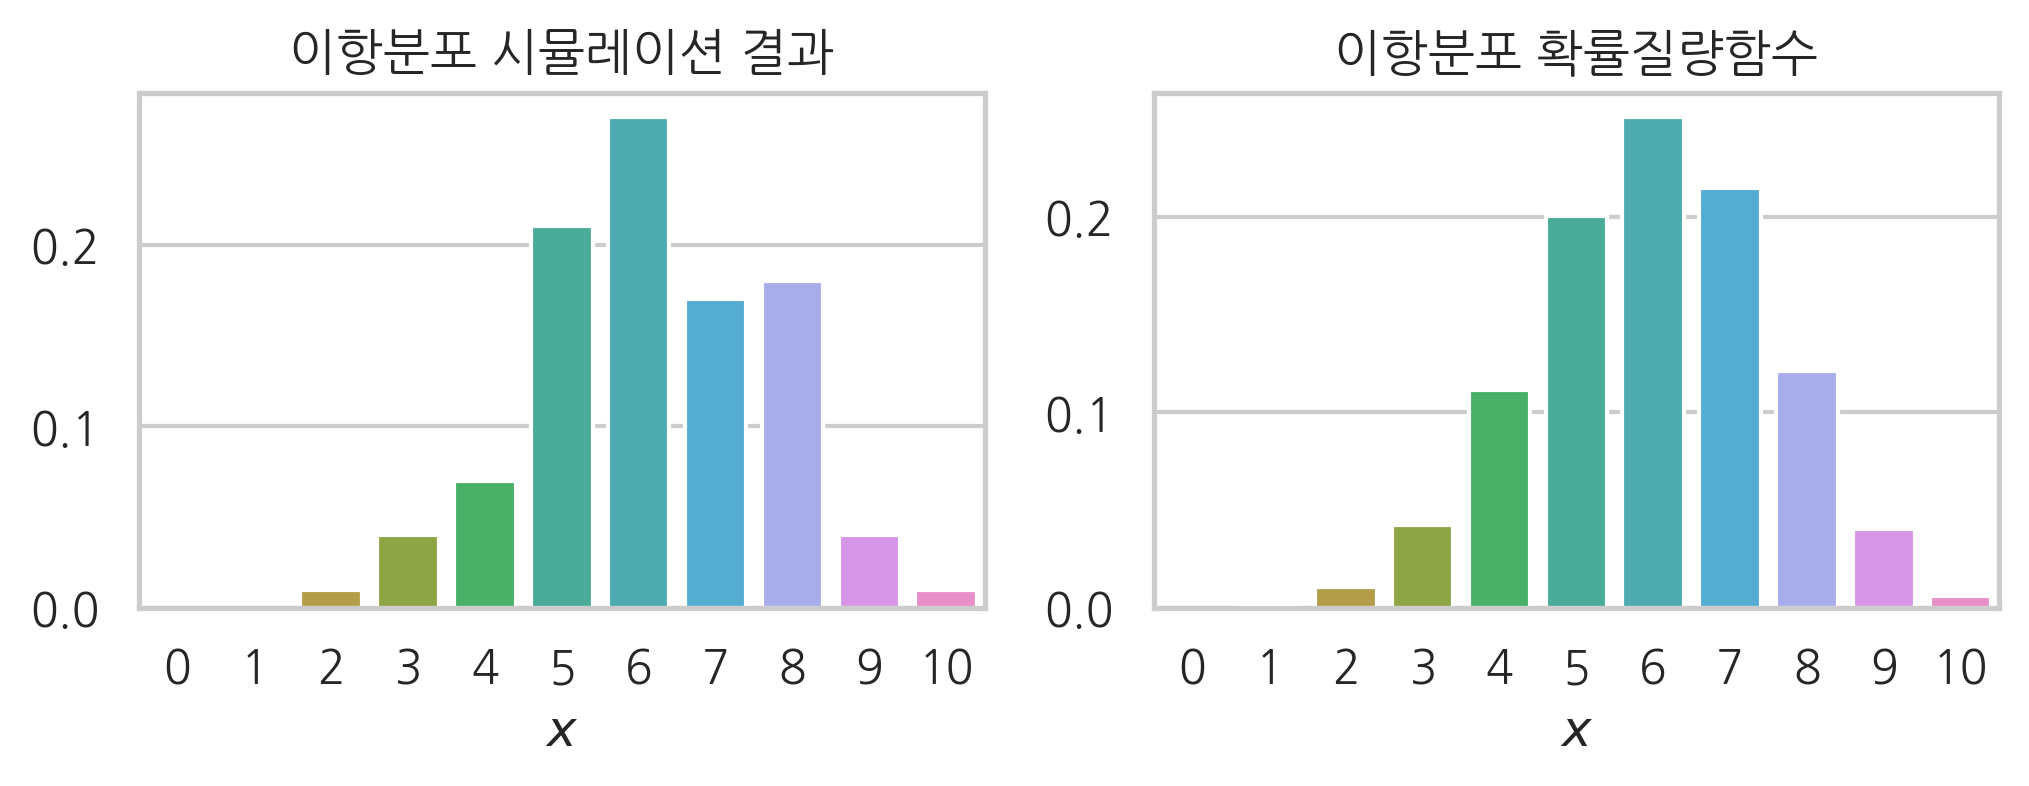

In [319]:
plt.subplot(221)
yy = np.bincount(x, minlength=11)/float(len(x))
sns.barplot(np.arange(11), yy)
plt.title('이항분포 시뮬레이션 결과')
plt.xlabel('$x$')

plt.subplot(222)
xx = np.arange(11)
yy = rv.pmf(xx)
sns.barplot(xx,yy)
plt.xlabel('$x$')
plt.title('이항분포 확률질량함수')
plt.show()

# 표본분포 모양이 이항분포 확률질량함수와 비슷하지만, 완전히 같진 않다.

In [342]:
N = 10
mu = 0.6
rv = sp.stats.binom(10,0.6) #이항분포 객체

pmf = rv.pmf(np.arange(N+1)) #이항분포 확률질량함숫값들

x = rv.rvs(100, random_state=0) #표본 시뮬레이션
yy = np.bincount(x, minlength=N+1)/float(len(x)) #표본 확률분포

df = pd.DataFrame({
    '이론' : pmf,
    '시뮬레이션' : yy
}, index=np.arange(N+1))

df2 = df.stack().reset_index()
df2.columns = ['표본값','유형','확률값']
df2.head(7)

,표본값,유형,확률값
0,0,이론,0.000105
1,0,시뮬레이션,0.000000
2,1,이론,0.001573
3,1,시뮬레이션,0.000000
4,2,이론,0.010617
5,2,시뮬레이션,0.010000
6,3,이론,0.042467


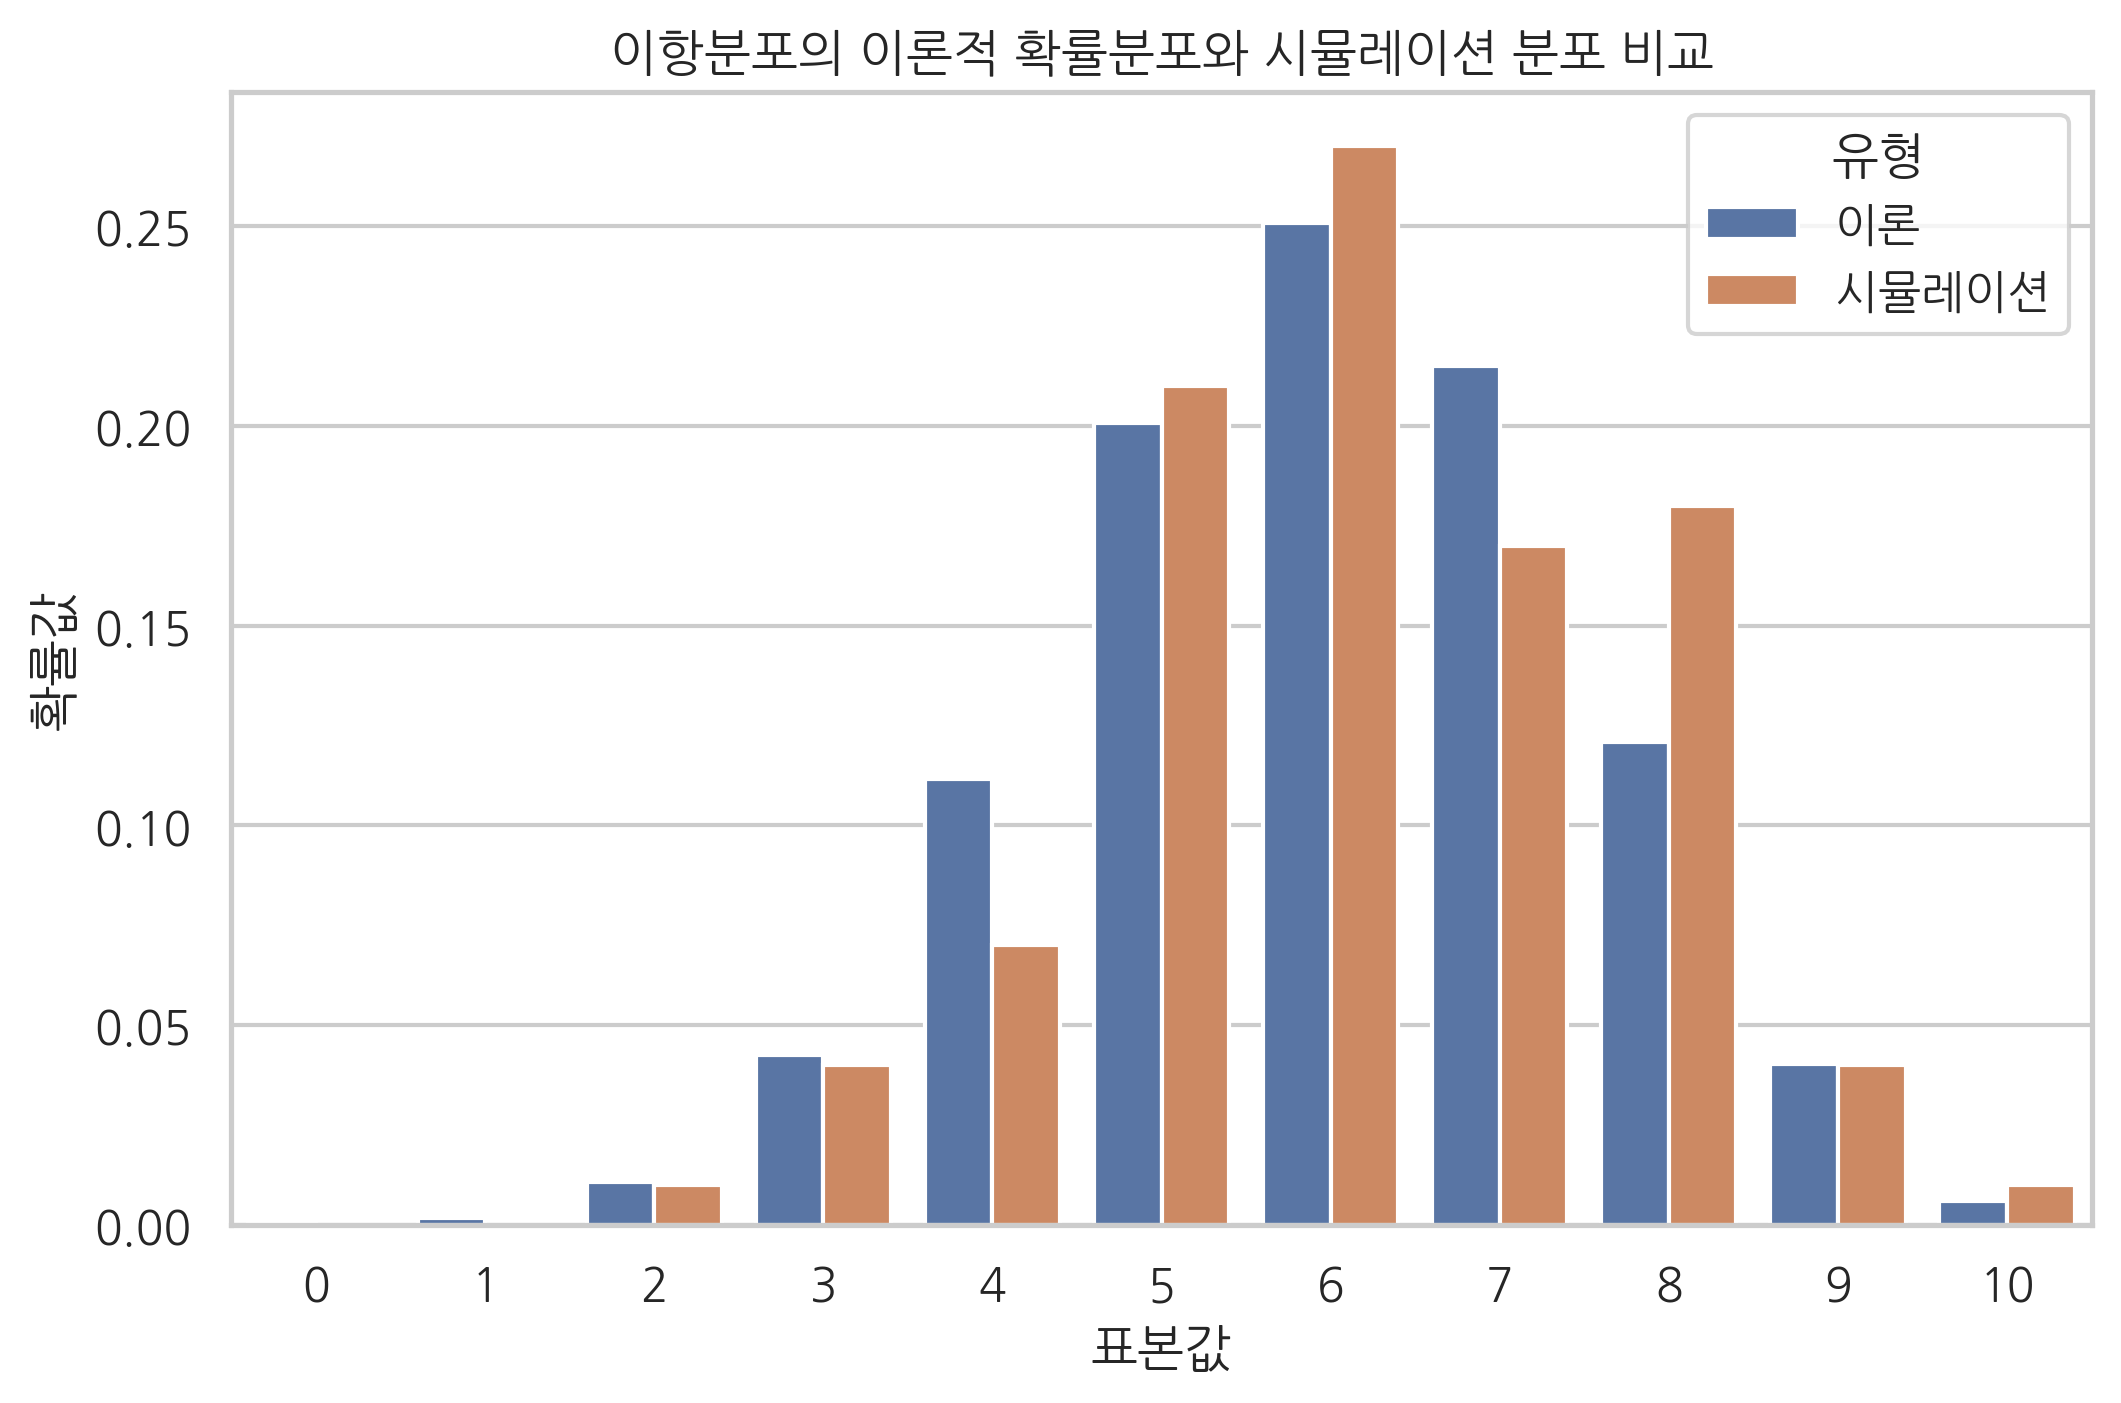

In [343]:
sns.barplot(x='표본값',y='확률값',hue='유형',data=df2)
plt.title('이항분포의 이론적 확률분포와 시뮬레이션 분포 비교')
plt.show()

# 표본분포는 이론적 확률분포함수와 비슷하지만 완전히 같진 않다.